# Projeto 2 - NLP

-----

O segundo projeto do m√≥dulo de Machine Learning ser√° focado no processamento de linguagem natural! Usaremos os algoritmos aprendidos e as t√©cnicas vistas na segunda parte do curso para extrairmos informa√ß√µes relevantes de texto. Mais precisamente, de publica√ß√µes no Twitter.

## Os Dados

Utilizaremos um Dataset obtido do Twitter com 100K postagens entre os dias 01/08/2018 e 20/10/2018. Cada postagem √© classificada como **positiva**, **negativa** ou **neutra**.  

Dois arquivos ser√£o disponilizados para o desenvolvimento dos modelos, um para treino/valida√ß√£o e outro para submiss√£o. Os arquivos se encontram na pasta */Dados/train* e */Dados/subm*, respectivamente.

Descri√ß√£o das colunas:

- **id**: ID √∫nico para o tweet  
- **tweet_text**: Texto da publica√ß√£o no Twitter  
- **tweet_date**: Data da publica√ß√£o no Twitter  
- **sentiment**: 0, se negativo; 1, se positivo; 2, se neutro  
- **query_used**: Filtro utilizado para buscar a publica√ß√£o

## O Problema

Voc√™ dever√° desenvolver um modelo para detectar o sentimento de uma publica√ß√£o do Twitter a classificando em uma das tr√™s categorias: **positiva**, **negativa** ou **neutra**. O texto da publica√ß√£o est√° dispon√≠vel na coluna "tweet_text". Teste pelo menos 3 t√©cnicas de NLP diferentes e escolha a m√©trica de avalia√ß√£o que julgar mais pertinente.  

Escolha o melhor modelo e gere uma base a partir dos dados de submiss√£o, que est√£o no caminho ```Dados/subm/Subm3Classes.csv```, com o seguinte formato:


|id|sentiment_predict
|-|-|
|12123232|0
|323212|1
|342235|2

Salve essa tabela como um arquivo csv com o nome ```<nome>_<sobrenome>_nlp_degree.csv``` e submeta-o como parte da entrega final do projeto.  

Para ajudar no desenvolvimento, √© poss√≠vel dividir o projeto em algumas fases:

- **An√°lise de consist√™ncia dos dados**: analise se os dados est√£o fazendo sentido, se os campos est√£o completos e se h√° dados duplicados ou faltantes. Se julgar necess√°rio, trate-os.    


- **An√°lise explorat√≥ria**: analise a sua base como um todo, verifique o balanceamento entre as classes e foque, principalmente, na coluna ```tweet_text```.    


- **Pr√©-processamento e transforma√ß√µes**: projetos de NLP exigem um consider√°vel pr√©-processamento. Foque no tratamento da string do texto. Procure come√ßar com tratamentos simples e adicione complexidade gradualmente. Nessa etapa voc√™ testar√° diferentes t√©cnicas de transforma√ß√µes, como o Bag Of Words e o TF-IDF.    


- **Treinamento do modelo**: depois das transforma√ß√µes, voc√™ poder√° executar o treinamento do modelo classificador. Nessa etapa o problema se torna semelhante aos abordados na primeira parte do m√≥dulo. Voc√™ pode testar diversos classificadores como RandomForest, AdaBoost, entre outros. Otimize os hiperpar√¢metros do modelo com t√©cnicas como a GridSearch e a RandomizedSearch.    


- **Conclus√µes**: descreva, em texto, as conclus√µes sobre os seus estudos. O modelo √© capaz de identificar o sentimento das publica√ß√µes? √â poss√≠vel extrapolar o modelo para outros contextos, como a an√°lise de sentimento de uma frase qualquer? Pense em quest√µes pertinentes e relevantes que voc√™ tenha obtido durante o desenvolvimento do projeto!     



## Crit√©rios de avalia√ß√£o

Os seguintes itens ser√£o avaliados:

1. Desenvolvimento das etapas descritas acima;


2. Reprodutibilidade do c√≥digo: seu c√≥digo ser√° executado e precisa gerar os mesmos resultados apresentados por voc√™;


3. Clareza: seu c√≥digo precisa ser claro e deve existir uma linha de racioc√≠nio direta. Comente o c√≥digo em pontos que julgar necess√°rio para o entendimento total;


4. Justificativa das conclus√µes obitdas: n√£o existir√° certo ou errado, mas as decis√µes e as conclus√µes precisam ser bem justificadas com base nos resultados obtidos.  

O desempenho do modelo **n√£o** ser√° considerado como crit√©rio de avalia√ß√£o.  

## Dicas

### Base de treino e submiss√£o

A base de submiss√£o n√£o possui a vari√°vel de sa√≠da, portanto ela ser√° utilizada **apenas** para gerar o arquivo que acompanha a submiss√£o do projeto.      

### Tente encontrar poss√≠veis vieses

√â muito comum que modelos de NLP possuam fortes vieses, como a tend√™ncia de relacionar palavras espec√≠ficas com alguma classe de sa√≠da. Tente encontrar vieses no seu estudo, isso pode ajudar a tirar boas conclus√µes. o campo "query_used" pode ser √∫til para essa an√°lise.  

### O pr√©-processamento √© a chave para um bom desempenho

Essa √© a etapa que mais vai contribuir para o desempenho do seu modelo. Seja criativo e desenvolva essa etapa de uma maneira que seja f√°cil de aplicar o mesmo processamento para uma nova base, voc√™ ter√° que fazer isso para gerar a base de submiss√£o.

### Um term√¥metro para o seu desenvolvimento

Ap√≥s a corre√ß√£o do seu projeto, o professor ir√° disponibilizar a sua acur√°cia obtida na base de submiss√£o. Voc√™ pode interpretar esse resultado como a simula√ß√£o do resultado do seu modelo em produ√ß√£o. Uma diferen√ßa entre o resultado do estudo e o resultado de submiss√£o indica um grau de **overfitting** no seu modelo.

-------

# Desenvolvimento do projeto

In [1]:
# Importando as bibliotecas necess√°rias
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_absolute_error
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

from mlxtend.plotting import plot_confusion_matrix

from lightgbm import LGBMClassifier

import missingno as msno
from wordcloud import WordCloud, STOPWORDS
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
from tqdm import tqdm

import nltk # natural language tool kit
nltk.download('rslp')
from nltk.stem import RSLPStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\thacr\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping stemmers\rslp.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thacr\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

## 1. Divis√£o da base de teste

In [2]:
df = pd.read_csv('Dados/train/Train3Classes.csv')

print(df.shape)

df.sample(10).head()

(95000, 5)


id                                         tweet_text  \
2997   1045397433558159361  N√≥s apanhamos com chuva sem problema... mas as...   
22222  1040020746037288960  Supremo considera ilegal a op√ß√£o pelo ensino d...   
38759  1044996567311233026  Pesquisa Ibope para presidente: Bolsonaro, 27%...   
83225  1042979604602863616  O ser humano come√ßa flertando de brincadeira q...   
37546  1045350658898120704  Nesse ano estrei como Coordenador na trilha de...   

                           tweet_date  sentiment query_used  
2997   Thu Sep 27 19:39:05 +0000 2018          1         :)  
22222  Wed Sep 12 23:34:03 +0000 2018          2      folha  
38759  Wed Sep 26 17:06:11 +0000 2018          2         g1  
83225  Fri Sep 21 03:31:30 +0000 2018          2      #fato  
37546  Thu Sep 27 16:33:13 +0000 2018          1         :)

In [3]:
df.head()

id                                         tweet_text  \
0  1049721159292346368  Rio elege maior bancada policial de sua hist√≥r...   
1  1046251157025423360  fiquei t√£o triste quando eu vi o pre√ßo da c√¢me...   
2  1041744620206653440  Para Theresa May, seu plano para o Brexit √© a ...   
3  1046937084727107589  caralho eu quero proteger a danielly em um pot...   
4  1047326854229778432                         @SiCaetano_ viva o caos :)   

                       tweet_date  sentiment query_used  
0  Tue Oct 09 18:00:01 +0000 2018          2      folha  
1  Sun Sep 30 04:11:28 +0000 2018          0         :(  
2  Mon Sep 17 17:44:06 +0000 2018          2      exame  
3  Tue Oct 02 01:37:06 +0000 2018          0         :(  
4  Wed Oct 03 03:25:55 +0000 2018          1         :)

Percebe-se que o DF n√£o est√° ordenado pela data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95000 entries, 0 to 94999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          95000 non-null  int64 
 1   tweet_text  95000 non-null  object
 2   tweet_date  95000 non-null  object
 3   sentiment   95000 non-null  int64 
 4   query_used  95000 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.6+ MB


In [5]:
# Hold out (separando 10% do DF para teste)
df_train, df_test = train_test_split(df, test_size=0.1, random_state=2022)

In [6]:
print(df_test.shape)

df_test.sample(10).head()

(9500, 5)


id                                         tweet_text  \
55007  1049140132559896576  @JesusMeMorre n√£o morre n√£o :( https://t.co/Oj...   
39523  1050343587282595840  Ciclone atinge a costa leste da √çndia com vent...   
41890  1037610201946513409  #FLA #Fato ‚ÄúEu voto em Jair Bolsonaro‚Äù - https...   
19442  1049187517533233152  @_weli__ @Danielly_Jesus @vickivashkov Tem raz...   
31503  1045466182168367106           tudo que eu tava db hoje, fiquei puto :)   

                           tweet_date  sentiment query_used  
55007  Mon Oct 08 03:31:14 +0000 2018          0         :(  
39523  Thu Oct 11 11:13:20 +0000 2018          2         g1  
41890  Thu Sep 06 07:55:24 +0000 2018          2      #fato  
19442  Mon Oct 08 06:39:31 +0000 2018          1         :)  
31503  Fri Sep 28 00:12:16 +0000 2018          1         :)

In [7]:
print(df_train.shape)

df_train.sample(10).head()

(85500, 5)


id                                         tweet_text  \
66934  1046929303466909696                        eu quero uma camisa rosa :(   
12326  1043672613623685120  "Tinha o rosto e o corpo um pouco magros, cabe...   
26208  1046233365769326592  @pleasesabino Ai menina :( pr√≥xima vez a gente...   
70842  1049204493630537728  @tereutrettel Qria mrm :( aquele aviao e bota ...   
48784  1046714488551092224                      @bolinhoofc mas vc eh mais :(   

                           tweet_date  sentiment query_used  
66934  Tue Oct 02 01:06:11 +0000 2018          0         :(  
12326  Sun Sep 23 01:25:16 +0000 2018          2  #trabalho  
26208  Sun Sep 30 03:00:47 +0000 2018          0         :(  
70842  Mon Oct 08 07:46:59 +0000 2018          0         :(  
48784  Mon Oct 01 10:52:35 +0000 2018          0         :(

## 2. An√°lise de consist√™ncia dos dados

<AxesSubplot:>

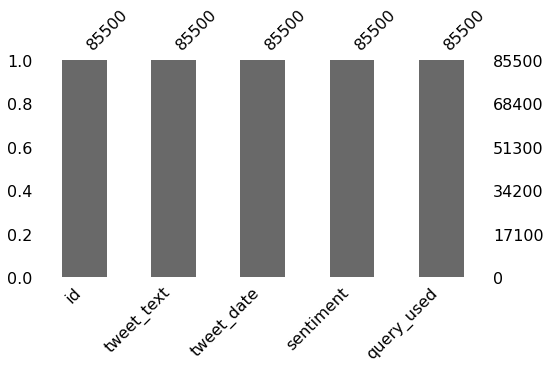

In [8]:
# Visualizando a porcentagem de dados v√°lidos
msno.bar(df_train, figsize=(8, 4))

<AxesSubplot:>

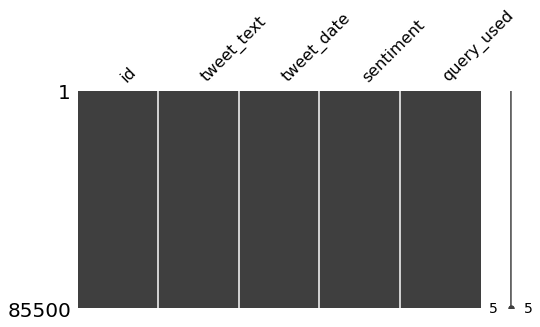

In [9]:
# Verificando se h√° dados nulos
msno.matrix(df_train, figsize=(8, 4))

N√£o h√° dados faltantes.

In [10]:
# Verificando dados duplicados no DF original inteiro
df[df.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          0 non-null      int64 
 1   tweet_text  0 non-null      object
 2   tweet_date  0 non-null      object
 3   sentiment   0 non-null      int64 
 4   query_used  0 non-null      object
dtypes: int64(2), object(3)
memory usage: 0.0+ bytes


In [11]:
# Verificando dados duplicados em "tweet_text", no DF original
df[df['tweet_text'].duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 1088 to 94760
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          816 non-null    int64 
 1   tweet_text  816 non-null    object
 2   tweet_date  816 non-null    object
 3   sentiment   816 non-null    int64 
 4   query_used  816 non-null    object
dtypes: int64(2), object(3)
memory usage: 38.2+ KB


In [12]:
print('DF original')
print(f'Porcentagem de duplicatas em "tweet_text": {((df.tweet_text.duplicated().sum())/(df.shape[0]))*100:.2f}%')

DF original
Porcentagem de duplicatas em "tweet_text": 0.86%


In [13]:
# Verificando dados duplicados em "tweet_text", no DF de treino
df_train[df_train['tweet_text'].duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 36965 to 54077
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          682 non-null    int64 
 1   tweet_text  682 non-null    object
 2   tweet_date  682 non-null    object
 3   sentiment   682 non-null    int64 
 4   query_used  682 non-null    object
dtypes: int64(2), object(3)
memory usage: 32.0+ KB


In [14]:
print('DF de treino')
print(f'Porcentagem de duplicatas em "tweet_text": {((df_train.tweet_text.duplicated().sum())/(df_train.shape[0]))*100:.2f}%')

DF de treino
Porcentagem de duplicatas em "tweet_text": 0.80%


N√£o h√° dados duplicados em rela√ß√£o do DF como um todo. E como h√° menos de 1% de duplicatas em "tweet_text", isso n√£o deve impactar na an√°lise explorat√≥ria e/ou performance do(s) modelos(s). Portanto, vamos manter o DF como est√°, sem remover essas duplicatas.

## 3. An√°lise explorat√≥ria

### 3.1 Target

In [15]:
# Verificando a porcentagem dos valores do target no DF original
np.round(df['sentiment'].value_counts(normalize=True)*100, 2)

0    33.36
1    33.35
2    33.29
Name: sentiment, dtype: float64

Os dados est√£o balanceados.

Vamos verificar se esse balanceamento se mant√©m, ap√≥s ter separado uma parte do DF para teste.

In [16]:
# Verificando a porcentagem dos valores do target no DF de teste
np.round(df_test['sentiment'].value_counts(normalize=True)*100, 2)

0    33.61
1    33.28
2    33.11
Name: sentiment, dtype: float64

In [17]:
# Verificando a porcentagem dos valores de target no DF de treino
np.round(df_train['sentiment'].value_counts(normalize=True)*100, 2)

1    33.35
0    33.34
2    33.31
Name: sentiment, dtype: float64

### 3.2 Coluna "query_used"

In [18]:
# Verificando a porcentagem dos valores de "query_used" no DF de treino
np.round(df_train['query_used'].value_counts(normalize=True)*100, 2)

:)               33.35
:(               33.34
folha             5.25
estadao           4.11
#fato             3.63
g1                3.62
exame             3.60
#trabalho         3.19
#oportunidade     2.60
jornaloglobo      2.50
veja              2.24
#noticia          1.18
#novidade         0.97
#curiosidade      0.41
Name: query_used, dtype: float64

In [19]:
df_train[(df_train['sentiment'] == 0)]['query_used'].value_counts()

:(    28503
Name: query_used, dtype: int64

In [20]:
df_train[(df_train['sentiment'] == 1)]['query_used'].value_counts()

:)    28516
Name: query_used, dtype: int64

In [21]:
df_train[(df_train['sentiment'] == 2)]['query_used'].value_counts()

folha            4490
estadao          3516
#fato            3104
g1               3093
exame            3080
#trabalho        2728
#oportunidade    2227
jornaloglobo     2135
veja             1917
#noticia         1010
#novidade         828
#curiosidade      353
Name: query_used, dtype: int64

Percebe-se que a coluna "query_used" j√° ajudaria a prever o sentimento dos textos. Por√©m, a proposta √© focar em "tweet_text".

### 3.3 Datas

In [22]:
# Verificando a data inicial, sem tranformar a feature de objeto para data
df_train['tweet_date'].min()

'Fri Aug 17 14:50:33 +0000 2018'

In [23]:
# Verificando a data final, sem tranformar a feature de objeto para data
df_train['tweet_date'].max()

'Wed Sep 26 23:58:10 +0000 2018'

In [24]:
# Transformando "tweet_date" de objeto para data
df_train = df_train.copy()
df_train['tweet_date'] = pd.to_datetime(df_train['tweet_date'])

In [25]:
# Verificando se o tipo foi alterado em "tweet_date"
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85500 entries, 43311 to 86909
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   id          85500 non-null  int64              
 1   tweet_text  85500 non-null  object             
 2   tweet_date  85500 non-null  datetime64[ns, UTC]
 3   sentiment   85500 non-null  int64              
 4   query_used  85500 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(2), object(2)
memory usage: 3.9+ MB


In [26]:
df_train['tweet_date'].min()

Timestamp('2018-08-09 01:59:00+0000', tz='UTC')

In [27]:
df_train['tweet_date'].max()

Timestamp('2018-10-19 18:40:47+0000', tz='UTC')

Sem transformar "tweet_date" de objeto para "datetime", a data inicial e final n√£o correspondem √†s verdadeiras, devido ao dia da semana aparecer no in√≠cio de cada data.

### 3.4 Duplicados

In [28]:
# Verificando 10 exemplos de textos √∫nicos, dentre os duplicados
pd.DataFrame(df_train[df_train['tweet_text'].duplicated()]['tweet_text'].unique()).sample(10)

0
136     foo :-) : cae81f58-2a01-423e-9fe3-b5e448f4adc0
306      foo :) : ba5340cf-e42c-48df-a9a6-5fc7798a9ecc
101      bar :( : 3a453bdb-ba65-48f5-b71a-bca241e4ac7a
212      bar :( : aee4b824-e16b-4173-abaa-24bfe354662b
178      foo :) : e62d5e14-8529-4c66-b67a-8b24c625aaeb
356  tenho um blog sobre a vida, o universo e tudo ...
50   Analista de Marketing - Belo Horizonte, MG htt...
418                    D√≥lar caiu :) - R$3,99 √†s 12:40
252  A√ßougueiro - S√£o Bernardo do Campo, SP https:/...
325  Gerente de RH - Catanduva, SP https://t.co/9vL...

In [29]:
# Mostrar os textos inteiros na coluna
pd.set_option('display.max_colwidth', None)

# Verificando 10 exemplos de textos √∫nicos, dentre os duplicados
pd.DataFrame(df_train[df_train['tweet_text'].duplicated()]['tweet_text'].unique()).sample(10)

0
49                                                                                                 Eu t√¥ bem triste :(
110                                                                     bar :-( : 7a946a2d-1394-499e-b6aa-7bf0f9ada022
310                                                                      Ohayou! Bom dia, amigos. Outra Segunda... :-(
79                                                                      foo :-) : 9e715cae-6e19-4700-9e84-245afbabca6f
401                                                                                                        ai gente :(
100                                                                     bar :-( : b4308b01-796e-4f43-b4c5-2c8827a683d3
138                                                                     foo :-) : 78ac4c09-f7e7-41e7-8b58-85a04e93339c
268  Auxiliar de Produ√ß√£o (Expedi√ß√£o) - S√£o Bernardo do Campo, SP https://t.co/yZnWyQzkmp #emprego #oportunidade #vaga
168                                                                      bar :( : 31022c95-404c-4a0d-87a6-e29db9ba289b
232                                                                                                        Bom diaa :)

In [30]:
# Verificando o balanceamento do target entre os textos duplicados
df_train[df_train['tweet_text'].duplicated()]['sentiment'].value_counts()

1    326
0    212
2    144
Name: sentiment, dtype: int64

Que bom! A maioria dos textos duplicados ou copiados s√£o de sentimento positivo. =)

### 3.5 N√∫mero de caracteres e palavras

In [31]:
# Criando outro DF s√≥ para manipular na an√°lise explorat√≥ria
df_train_eda = df_train.copy()

# Criando colunas para verificar o n√∫mero de caracterers e palavras dos textos
df_train_eda['num_caracteres'] = df_train['tweet_text'].str.len()
df_train_eda['num_palavras'] = df_train['tweet_text'].str.split().str.len()

df_train_eda.head()

id  \
43311  1047562047054127107   
83346  1049305280616456193   
78821  1050771464515985409   
31205  1040684108836417537   
63392  1045437815503421441   

                                                                                                                                                                                        tweet_text  \
43311                                                                                                       meu pai vai votar no cabo Daciolo, disse que √© melhor do que jogar o voto dele fora :)   
83346  @kookteamo me perdoa beb√™, tem dias que eu n√£o abro o wpp, estou esperando a sensa√ß√£o ruim que eu estou sentindo no peito passar :( n√£o quero ser chata com ningu√©m, muito menos contigo :(   
78821                                                                                                                     @nolimcr @loveoflesbian @warnermusicmex $245, 2 CDs + 2 DVDs. Saludos :)   
31205                                                                                                                                                               #TVEJA https://t.co/I58krGZ7wR   
63392                                                                                                                                                                        bem. √Åguas Fl√°vias :)   

                     tweet_date  sentiment query_used  num_caracteres  \
43311 2018-10-03 19:00:29+00:00          1         :)              86   
83346 2018-10-08 14:27:28+00:00          0         :(             187   
78821 2018-10-12 15:33:34+00:00          1         :)              72   
31205 2018-09-14 19:30:01+00:00          2       veja              30   
63392 2018-09-27 22:19:33+00:00          1         :)              21   

       num_palavras  
43311            19  
83346            35  
78821            11  
31205             2  
63392             4

In [32]:
# Verificando o tweet que possui o maior n√∫mero de caracteres
df_train_eda[df_train_eda['num_caracteres']==df_train_eda['num_caracteres'].max()]

id  \
36682  1049296171339067392   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            tweet_text  \
36682  @FtimaFaria7 @beatrizheng1 @leilasbsantos @valdirenealvesr @Fatimasilva7 @Marcosdiasdas17 @leny_cacheada @CarraroSilva10 @martasigrist @marlenelotU2 @sforcinijunior @votorioA1 @OLivro_Sagrado @Josfilh35177225 @SPENDportugal @LuisHen93885989 @rodriguesjonjon @GugaDoze @JosePedro1898 @JesusNasLinhas @ggabrie61874346 @perolastewart @LeandroPoiema @azevedovictor10 @atrebore @jovenscomjesus1 @Meninadultablog @EntreDeuseEu @ConfiaiemDeus @relateicitacoes @FrasesCrist1 @RafaelaRozane @_foiporamor @KethellenCr @MarcelloBrayner @ChurchTimes @TomsFonseca @le_meirelles @DatOneGuyPedro @mendeszec @fbruno1959 @Maggie70883807 @Don_Miguez @helderebelo @robertofife @MiguelxBernardo @JoseAdelinoAlm2 @MariaCordeRosa3 @fasgoncalves @BernardoMBlanco Bom dia! :)   

                     tweet_date  sentiment query_used  num_caracteres  \
36682 2018-10-08 13:51:16+00:00          1         :)             751   

       num_palavras  
36682            53

De acordo com uma pesquisa r√°pida no Google, como o Twitter aceita no m√°ximo 280 caracteres, na verdade, o texto acima seria apenas: "Bom dia! :)".

Como os nomes de usu√°rios n√£o teriam rela√ß√£o com os sentimentos dos textos, vamos remov√™-los.

In [33]:
# Fun√ß√£o para remover os nomes de usu√°rios dos tweets
def clean_username(texts):
    return texts.replace(r'@\S+', '', regex=True)

In [34]:
# Removendo os nomes de usu√°rios dos textos
df_train_eda['tweet_text'] = clean_username(df_train_eda['tweet_text'])

In [35]:
# Refazendo as colunas com o n√∫mero de caracterers e palavras dos textos
df_train_eda['num_caracteres'] = df_train_eda['tweet_text'].str.len()
df_train_eda['num_palavras'] = df_train_eda['tweet_text'].str.split().str.len()

In [36]:
# Verificando novamente o tweet que possui o maior n√∫mero de caracteres
df_train_eda[df_train_eda['num_caracteres']==df_train_eda['num_caracteres'].max()]

id  \
82892  1038968349361889280   

                                                                                                                                                                                                                                                                                                                    tweet_text  \
82892  ..continuado:/ Catra, v√° em Paz! Sincero pesar √† fam√≠lia. Muita Paz!üíêüíêüíê / Botafogo, ainda vai me colapsar./ Domingo pra l√° de calmo, gente./ Acho que muitos Virtuais, est√£o tontos de tantos fakes./ Por falar em #Fato &gt; #nemPTnemPSL &gt; #LulaNaCadeia &amp; #BolsonaroJAMAIS&gt;N√©, üáßüá∑/ https://t.co/lcZpl4K7yq   

                     tweet_date  sentiment query_used  num_caracteres  \
82892 2018-09-10 01:52:12+00:00          2      #fato             311   

       num_palavras  
82892            44

In [37]:
# Verificando os tweets que possuem o menor n√∫mero de caracteres
df_train_eda[df_train_eda['num_caracteres']==df_train_eda['num_caracteres'].min()]

id tweet_text                tweet_date  sentiment  \
50880  1046937173319176192    Poxa :( 2018-10-02 01:37:27+00:00          0   
69832  1046235427798228993    :( sdds 2018-09-30 03:08:58+00:00          0   
71968  1045496604919312385     Sim :P 2018-09-28 02:13:09+00:00          1   
3495   1049317222055927808     vou :D 2018-10-08 15:14:55+00:00          1   
50621  1049153868452585472    Ptmr :( 2018-10-08 04:25:49+00:00          0   
31299  1046698684610678784    poxa :( 2018-10-01 09:49:47+00:00          0   
18130  1046771221998837761    :( hoje 2018-10-01 14:38:02+00:00          0   
67263  1046987838804414464    aiai :( 2018-10-02 04:58:47+00:00          0   
33855  1048393256395034624     Vdd :D 2018-10-06 02:03:25+00:00          1   
86131  1045480067294474240     Ola :p 2018-09-28 01:07:26+00:00          1   
41462  1050730883953639424    Deus :) 2018-10-12 12:52:19+00:00          1   
47903  1046779320369393665    poxa :( 2018-10-01 15:10:12+00:00          0   
28600  1047331185616216064     Pqp :P 2018-10-03 03:43:07+00:00          1   
27009  1046950814412156928    Poxa :( 2018-10-02 02:31:40+00:00          0   
28337  1047387491202822145    Sabr :) 2018-10-03 07:26:52+00:00          1   
50248  1045447187201748993     vlw :D 2018-09-27 22:56:47+00:00          1   
51704  1048436177366409217     Boa :D 2018-10-06 04:53:58+00:00          1   
8935   1049140231755259904    aiai :( 2018-10-08 03:31:37+00:00          0   
1108   1046934501774020608    poxa :( 2018-10-02 01:26:50+00:00          0   
73586  1047442188546785286    aiai :) 2018-10-03 11:04:12+00:00          1   
43452  1047335427282259968    mela :) 2018-10-03 03:59:59+00:00          1   
52173  1045427065405804544     N√£o :D 2018-09-27 21:36:50+00:00          1   
83338  1049269578990329856     Blz :P 2018-10-08 12:05:36+00:00          1   
29688  1047393619353767937    Furo :) 2018-10-03 07:51:13+00:00          1   
58703  1045400667886637062     sim :P 2018-09-27 19:51:56+00:00          1   
18297  1048428190991933440    bobo :) 2018-10-06 04:22:14+00:00          1   
79850  1047560242962321408    aiai :p 2018-10-03 18:53:19+00:00          1   
66508  1046960012839534593    Sdds :( 2018-10-02 03:08:13+00:00          0   
56069  1047338427170148352     obg :D 2018-10-03 04:11:54+00:00          1   

      query_used  num_caracteres  num_palavras  
50880         :(               7             2  
69832         :(               7             2  
71968         :)               7             2  
3495          :)               7             2  
50621         :(               7             2  
31299         :(               7             2  
18130         :(               7             2  
67263         :(               7             2  
33855         :)               7             2  
86131         :)               7             2  
41462         :)               7             2  
47903         :(               7             2  
28600         :)               7             2  
27009         :(               7             2  
28337         :)               7             2  
50248         :)               7             2  
51704         :)               7             2  
8935          :(               7             2  
1108          :(               7             2  
73586         :)               7             2  
43452         :)               7             2  
52173         :)               7             2  
83338         :)               7             2  
29688         :)               7             2  
58703         :)               7             2  
18297         :)               7             2  
79850         :)               7             2  
66508         :(               7             2  
56069         :)               7             2

In [38]:
# Verificando a m√©dia do n√∫mero de caracteres
df_train_eda['num_caracteres'].mean()

91.2279298245614

In [39]:
df_train_eda[df_train_eda['num_caracteres'] > df_train_eda['num_caracteres'].mean()]['sentiment'].value_counts()

2    21089
1     9053
0     6253
Name: sentiment, dtype: int64

Os textos com o n√∫mero de caracteres acima da m√©dia possuem um sentimento neutro na maioria das vezes. 

In [40]:
df_train_eda[df_train_eda['num_caracteres'] < df_train_eda['num_caracteres'].mean()]['sentiment'].value_counts()

0    22250
1    19463
2     7392
Name: sentiment, dtype: int64

J√° os textos com o n√∫mero de caracteres abaixo da m√©dia possuem um sentimento negativo na maioria das vezes.

### 3.6 WordCloud

In [41]:
def plot_wordcloud(texts):
    plt.figure(figsize=(10, 10))
    text = ' '.join(texts.tolist())
    WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=5)
    words = WC.generate(text)
    plt.imshow(words, interpolation='bilinear')
    plt.show()

#### 3.4.1 Sentimento negativo

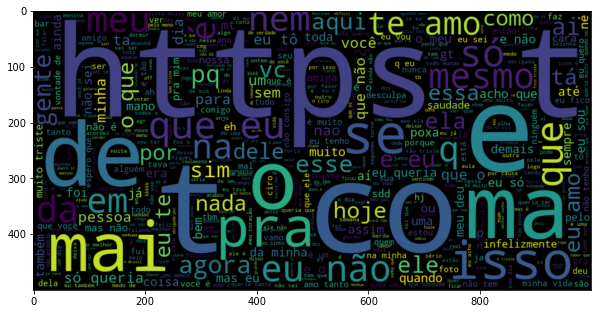

In [42]:
plot_wordcloud(df_train_eda.loc[df_train_eda['sentiment'] == 0, 'tweet_text'])

#### 3.4.2 Sentimento positivo

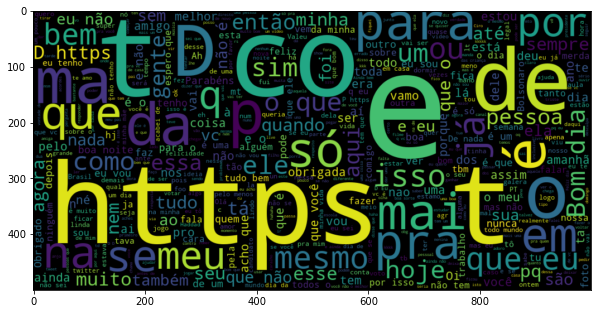

In [43]:
plot_wordcloud(df_train_eda.loc[df_train_eda['sentiment'] == 1, 'tweet_text'])

#### 3.4.3 Sentimento neutro

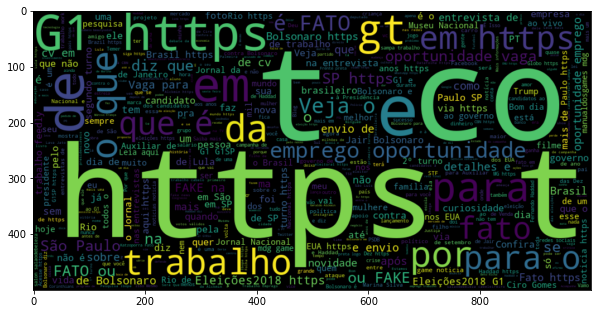

In [44]:
plot_wordcloud(df_train_eda.loc[df_train_eda['sentiment'] == 2, 'tweet_text'])

Al√©m de "https" que se destaca nas tr√™s nuvens de palavras, aparecem outros termos que agregam pouco significado, dificultando a an√°lise.   
Portanto, vamos remov√™-los utilizando algumas fun√ß√µes, "stop_words", al√©m de deixar todos os textos em letras min√∫sculas.

In [45]:
# Fun√ß√£o para remover link de um texto
def clean_url(texts):
    return texts.replace(r'http\S+', '', regex=True)

In [46]:
# Removendo os links dos textos
df_train_eda['tweet_text'] = clean_url(df_train_eda['tweet_text'])

In [47]:
# Verificando se ainda h√° "http" nos textos
df_train_eda[df_train_eda['tweet_text'].str.contains('http')]

Empty DataFrame
Columns: [id, tweet_text, tweet_date, sentiment, query_used, num_caracteres, num_palavras]
Index: []

In [48]:
# Fun√ß√£o para deixar um texto em letras min√∫sculas
def normalize_texts(texts):
    return texts.str.lower()

In [49]:
# Deixando os textos em letras min√∫sculas
df_train_eda['tweet_text'] = normalize_texts(df_train_eda['tweet_text'])

In [50]:
# Pegando as "stop words" em portugu√™s
pt_stopwords = stopwords.words('portuguese')
pt_stopwords

['de',
 'a',
 'o',
 'que',
 'e',
 '√©',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'n√£o',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 '√†',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'j√°',
 'eu',
 'tamb√©m',
 's√≥',
 'pelo',
 'pela',
 'at√©',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'voc√™',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 '√†s',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'n√≥s',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'voc√™s',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'est√°',
 'estamos',
 'est√£o',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'est√°vamos',
 'estavam

In [51]:
# Fun√ß√£o para remover as "stop words"
def clean_pt_stopwords(texts):
    clean_text = r'\b(?:{})\b'.format('|'.join(pt_stopwords))
    return texts.replace(clean_text, '', regex=True)

In [52]:
# Removendo as "stop words"
df_train_eda['new_tweet_text'] = clean_pt_stopwords(df_train_eda['tweet_text'])

In [53]:
pd.set_option('display.max_colwidth', None)
df_train_eda.head()

id  \
43311  1047562047054127107   
83346  1049305280616456193   
78821  1050771464515985409   
31205  1040684108836417537   
63392  1045437815503421441   

                                                                                                                                                                              tweet_text  \
43311                                                                                             meu pai vai votar no cabo daciolo, disse que √© melhor do que jogar o voto dele fora :)   
83346   me perdoa beb√™, tem dias que eu n√£o abro o wpp, estou esperando a sensa√ß√£o ruim que eu estou sentindo no peito passar :( n√£o quero ser chata com ningu√©m, muito menos contigo :(   
78821                                                                                                                                                   $245, 2 cds + 2 dvds. saludos :)   
31205                                                                                                                                                                            #tveja    
63392                                                                                                                                                              bem. √°guas fl√°vias :)   

                     tweet_date  sentiment query_used  num_caracteres  \
43311 2018-10-03 19:00:29+00:00          1         :)              86   
83346 2018-10-08 14:27:28+00:00          0         :(             177   
78821 2018-10-12 15:33:34+00:00          1         :)              35   
31205 2018-09-14 19:30:01+00:00          2       veja              30   
63392 2018-09-27 22:19:33+00:00          1         :)              21   

       num_palavras  \
43311            19   
83346            34   
78821             8   
31205             2   
63392             4   

                                                                                                                               new_tweet_text  
43311                                                                          pai vai votar  cabo daciolo, disse   melhor   jogar  voto   :)  
83346    perdoa beb√™,  dias    abro  wpp,  esperando  sensa√ß√£o ruim    sentindo  peito passar :(  quero ser chata  ningu√©m,  menos contigo :(  
78821                                                                                                        $245, 2 cds + 2 dvds. saludos :)  
31205                                                                                                                                 #tveja   
63392                                                                                                                   bem. √°guas fl√°vias :)

No primeiro registro, percebe-se que a palavra "fora" foi exclu√≠da do texto.   
Pensando em contextos pol√≠ticos, por exemplo, em que essa palavra pode ter um significado relevante, talvez seja prudente remov√™-la das "stop words".

In [54]:
pt_stopwords.remove('fora')
pt_stopwords

['de',
 'a',
 'o',
 'que',
 'e',
 '√©',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'n√£o',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 '√†',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'j√°',
 'eu',
 'tamb√©m',
 's√≥',
 'pelo',
 'pela',
 'at√©',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'voc√™',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 '√†s',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'n√≥s',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'voc√™s',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'est√°',
 'estamos',
 'est√£o',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'est√°vamos',
 'estavam

In [55]:
# Adicionando na lista "pt_stopwords" alguns termos irrelevantes que se destacaram nas nuvens de palavras
new_words = ['q', 'pra', 'd', 'p']
for word in new_words:
    pt_stopwords.append(word)
    
pt_stopwords

['de',
 'a',
 'o',
 'que',
 'e',
 '√©',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'n√£o',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 '√†',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'j√°',
 'eu',
 'tamb√©m',
 's√≥',
 'pelo',
 'pela',
 'at√©',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'voc√™',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 '√†s',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'n√≥s',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'voc√™s',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'est√°',
 'estamos',
 'est√£o',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'est√°vamos',
 'estavam

In [56]:
# Removendo as "stop words" com os novos termos inseridos na lista
df_train_eda['new_tweet_text'] = clean_pt_stopwords(df_train_eda['tweet_text'])

#### 3.4.4 Sentimento negativo (ap√≥s tratamento dos dados)

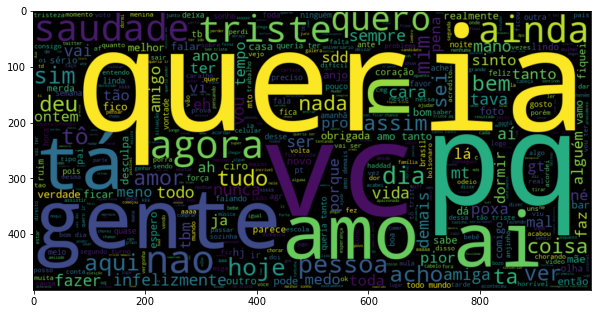

In [57]:
plot_wordcloud(df_train_eda.loc[df_train_eda['sentiment'] == 0, 'new_tweet_text'])

Alguns tweets que me chamaram a aten√ß√£o foram os que possuem a palavra "amo" ou a express√£o "amo voc√™".

In [58]:
df_train_eda[df_train_eda['tweet_text'].str.contains('amo')]['sentiment'].value_counts()

0    2720
1    1965
2    1182
Name: sentiment, dtype: int64

In [59]:
df_train_eda[df_train_eda['tweet_text'].str.contains('amo voc√™')]['sentiment'].value_counts()

0    58
1    12
2     1
Name: sentiment, dtype: int64

O fato de aparecer essa palavra ou express√£o nos textos, automaticamente, faz com que eu as associe a um sentimento positivo. Por√©m, na maioria das vezes, elas aparecem ao lado de um emoticon de tristeza, ou seja, um sentimento negativo.

Ao "plotar" a nuvem de palavras relacionadas ao sentimento negativo, a princ√≠pio, imaginei que encontraria muitos termos que demonstrassem indigna√ß√£o, raiva, al√©m de tristeza.
No entanto, se analisarmos essa nuvem, nota-se palavras como: "queria", "amo", "agora", "saudade", "quero", "ainda" etc.
Ou seja, parece que, com esses dados, o sentimento negativo est√° mais associado √† nostalgia ou a um anseio de se obter aquilo que deseja.   
Isso explicaria o fato de "amo" ou "amo voc√™" estarem associadas a um sentimento negativo, como visto nas an√°lises acima.

#### 3.4.5 Sentimento positivo (ap√≥s tratamento dos dados)

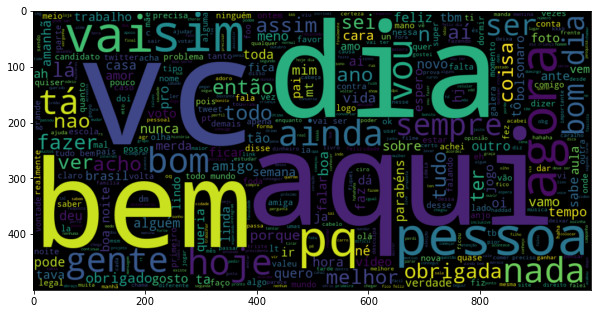

In [60]:
plot_wordcloud(df_train_eda.loc[df_train_eda['sentiment'] == 1, 'new_tweet_text'])

#### 3.4.6 Sentimento neutro (ap√≥s tratamento dos dados)

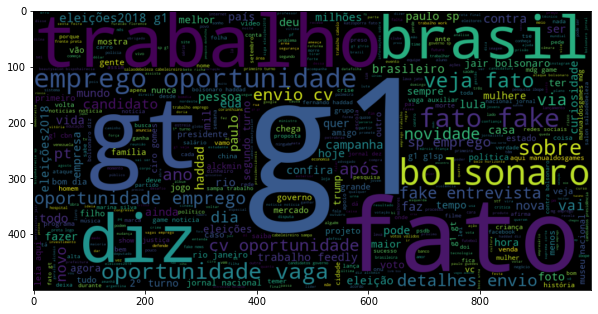

In [61]:
plot_wordcloud(df_train_eda.loc[df_train_eda['sentiment'] == 2, 'new_tweet_text'])

### 3.5 An√°lise temporal

In [62]:
df_train_eda['y_m_d'] = df_train_eda['tweet_date'].dt.strftime('%Y%m%d')

df_train_eda.head()

id  \
43311  1047562047054127107   
83346  1049305280616456193   
78821  1050771464515985409   
31205  1040684108836417537   
63392  1045437815503421441   

                                                                                                                                                                              tweet_text  \
43311                                                                                             meu pai vai votar no cabo daciolo, disse que √© melhor do que jogar o voto dele fora :)   
83346   me perdoa beb√™, tem dias que eu n√£o abro o wpp, estou esperando a sensa√ß√£o ruim que eu estou sentindo no peito passar :( n√£o quero ser chata com ningu√©m, muito menos contigo :(   
78821                                                                                                                                                   $245, 2 cds + 2 dvds. saludos :)   
31205                                                                                                                                                                            #tveja    
63392                                                                                                                                                              bem. √°guas fl√°vias :)   

                     tweet_date  sentiment query_used  num_caracteres  \
43311 2018-10-03 19:00:29+00:00          1         :)              86   
83346 2018-10-08 14:27:28+00:00          0         :(             177   
78821 2018-10-12 15:33:34+00:00          1         :)              35   
31205 2018-09-14 19:30:01+00:00          2       veja              30   
63392 2018-09-27 22:19:33+00:00          1         :)              21   

       num_palavras  \
43311            19   
83346            34   
78821             8   
31205             2   
63392             4   

                                                                                                                               new_tweet_text  \
43311                                                                      pai vai votar  cabo daciolo, disse   melhor   jogar  voto  fora :)   
83346    perdoa beb√™,  dias    abro  wpp,  esperando  sensa√ß√£o ruim    sentindo  peito passar :(  quero ser chata  ningu√©m,  menos contigo :(   
78821                                                                                                        $245, 2 cds + 2 dvds. saludos :)   
31205                                                                                                                                 #tveja    
63392                                                                                                                   bem. √°guas fl√°vias :)   

          y_m_d  
43311  20181003  
83346  20181008  
78821  20181012  
31205  20180914  
63392  20180927

In [63]:
df_historic = df_train_eda.groupby(['y_m_d', 'sentiment'])[['tweet_date']].count().reset_index()

df_historic.head()

y_m_d  sentiment  tweet_date
0  20180809          2           1
1  20180817          2         202
2  20180818          2         185
3  20180819          2         147
4  20180820          2         287

In [64]:
pivot = pd.pivot_table(df_historic, values='tweet_date', index='y_m_d', columns='sentiment').fillna(0)

pivot.head()

sentiment    0    1      2
y_m_d                     
20180809   0.0  0.0    1.0
20180817   0.0  0.0  202.0
20180818   0.0  0.0  185.0
20180819   0.0  0.0  147.0
20180820   0.0  0.0  287.0

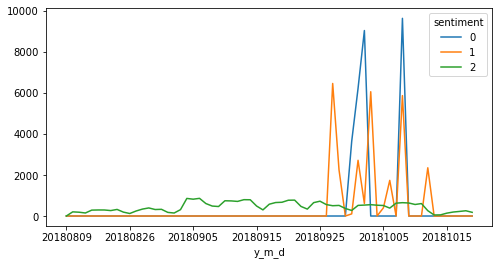

In [65]:
pivot.plot(figsize=(8, 4))
plt.show()

Percebe-se que os sentimentos negativos e positivos s√£o identificados apenas em um relativo curto per√≠odo de tempo.   
Lembrando que, nesse per√≠odo, houve um grande movimento de debates em rela√ß√£o √† elei√ß√£o de 2018, n√£o s√≥ na m√≠dia como tamb√©m em reuni√µes entre amigos, familiares, em institui√ß√µes de ensino, no trabalho etc.

In [66]:
for coluna in pivot.columns:
    pivot[coluna] = pivot[coluna].rolling(15).mean()
    
pivot.head()

sentiment   0   1   2
y_m_d                
20180809  NaN NaN NaN
20180817  NaN NaN NaN
20180818  NaN NaN NaN
20180819  NaN NaN NaN
20180820  NaN NaN NaN

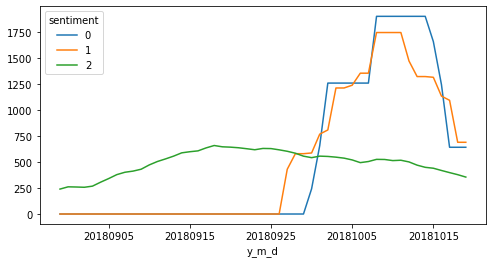

In [67]:
# Verificando a m√©dia dos sentimentos em intervalos de 15 dias
pivot.plot(figsize=(8, 4))
plt.show()

In [68]:
# Verificando uma amostra dos dados em rela√ß√£o aos sentimentos positivos e negativos, ap√≥s o 1¬∫ turno da elei√ß√£o de 2018,
# para ver se h√° debates sobre pol√≠tica.
df_train_eda[(df_train_eda['sentiment'] != 2) & (df_train_eda['y_m_d'] >= '20181007')].sample(10)

id  \
10931  1049104388046966784   
62730  1049138584895283201   
94973  1050744223627137026   
94715  1050760997949136896   
36708  1049135485417869312   
40831  1049274674763522048   
45548  1049307983493181440   
55377  1049277891236773888   
70529  1049103855072550912   
67603  1049222676596908033   

                                                                                                                                                                                                                                                                           tweet_text  \
10931                                                                                                                                                                                                                                                  tomei sim :)) esperoo boe obgg   
62730   eu n√£o consigo nem pensar em ter um melhor amigo(a) que vote nesse ser. pq pra votar nele tem que concordar pelo menos um pouco com o modo dele de pensar, e eu sou meio que muita coisa que ele odeia. ent√£o nem teria como estabelecer uma amizade com algu√©m que ap√≥ia. :p   
94973                                                                                                                 oi mauro. gosto muito do seu trabalho e das suas criticas. mas o flamengo tamb√©m tem esse lado mais humano :d e sem o bandeira ^^ ent√£o hj chega de criticas :d   
94715                                                                                                                                                                                        bom dia, galerinha!! uma √≥tema sexta-feira a todos n√≥s e feliz dia das crian√ßas!! :d....   
36708                                                                                                                                                                      algu√©m me diz algumas m√∫sicas boas pra eu ouvir amanh√£?? n quero ouvir meus coleguinhas cagar pela boca :)   
40831                                                                                                                                                                                                                                                                 a√≠ num pode. :(   
45548                                                                                                                                                                                                                                                    intelecto maior que o seu :p   
55377                                                                                                                                                                                                                                                 olha a carinha do meu nenem :(    
70529                                                                                                                                                                                                                     qual profiss√£o deveria ser mais valorizada? ‚Äî professor :)    
67603                                                                                                                                                                                     kkkkk age como se a ditadura fosse algo lindo, triste ver a falta de conhecimento alheio :)   

                     tweet_date  sentiment query_used  num_caracteres  \
10931 2018-10-08 01:09:12+00:00          1         :)              31   
62730 2018-10-08 03:25:05+00:00          1         :)             270   
94973 2018-10-12 13:45:19+00:00          1         :)             161   
94715 2018-10-12 14:51:58+00:00          1         :)              88   
36708 2018-10-08 03:12:46+00:00          1         :)             106   
40831 2018-10-08 12:25:51+00:00          0         :(              16   
45548 2018-10-08 14:38:13+00:00          1         :)              29   
5

## 4. Pr√©-processamento e modelagem

In [69]:
X = df_train['tweet_text']
y = df_train['sentiment']

X = clean_username(X)
X = clean_url(X)
X = normalize_texts(X)
X = clean_pt_stopwords(X)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.2, random_state=2022)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(68400,) (68400,)
(17100,) (17100,)


In [70]:
def score_train(y_train, y_train_pred):

    acc_train = accuracy_score(y_train, y_train_pred)
    prec_train = precision_score(y_train, y_train_pred, average='macro')
    rec_train = recall_score(y_train, y_train_pred, average='macro')

    print(f'Treino:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
    
def score_valid(y_valid, y_valid_pred):
    
    acc_valid = accuracy_score(y_valid, y_valid_pred)
    prec_valid = precision_score(y_valid, y_valid_pred, average='macro')
    rec_valid = recall_score(y_valid, y_valid_pred, average='macro')
    
    print(f'Valida√ß√£o:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')
    
def score_test(y_test, y_test_pred):
    
    acc_test = accuracy_score(y_test, y_test_pred)
    prec_test = precision_score(y_test, y_test_pred, average='macro')
    rec_test = recall_score(y_test, y_test_pred, average='macro')

    print(f'Teste:\nAcc: {acc_test:.2f}, Precision: {prec_test:.2f}, Recall: {rec_test:.2f}')
    
def plot_cm(y, y_pred, names):
    
    cm = confusion_matrix(y, y_pred)

    fig, ax = plot_confusion_matrix(conf_mat=cm, class_names=names)

    fig.set_size_inches(5, 5)

    plt.show()

### 4.1 Bag Of Words

In [71]:
vectorizer = CountVectorizer(max_features=10000)

vectorizer.fit(X_train)
    
X_train_transformed = vectorizer.transform(X_train).toarray()
print(X_train_transformed.shape)

X_valid_transformed = vectorizer.transform(X_valid).toarray()
print(X_valid_transformed.shape)

(68400, 10000)
(17100, 10000)


#### 4.1.1 Random Forest

In [72]:
modelo = RandomForestClassifier(max_depth=5, random_state=2022)

modelo.fit(X_train_transformed, y_train)

RandomForestClassifier(max_depth=5, random_state=2022)

In [73]:
y_train_pred = modelo.predict(X_train_transformed)

y_valid_pred = modelo.predict(X_valid_transformed)

print(y_train_pred.shape, y_valid_pred.shape)

(68400,) (17100,)


In [74]:
score_train(y_train, y_train_pred)

score_valid(y_valid, y_valid_pred)

Treino:
Acc: 0.68, Precision: 0.73, Recall: 0.68
Valida√ß√£o:
Acc: 0.68, Precision: 0.73, Recall: 0.68


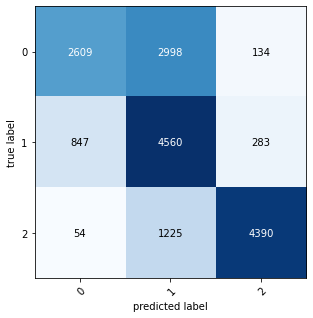

In [75]:
plot_cm(y_valid, y_valid_pred, modelo.classes_)

##### 4.1.1.1 Infer√™ncia na base de teste

In [76]:
X_test = df_test['tweet_text']
y_test = df_test['sentiment']

X_test = clean_username(X_test)
X_test = clean_url(X_test)
X_test = normalize_texts(X_test)
X_test = clean_pt_stopwords(X_test)

print(X_test.shape, y_test.shape)

(9500,) (9500,)


In [77]:
X_test_transformed = vectorizer.transform(X_test).toarray()

print(X_test_transformed.shape)

(9500, 10000)


In [78]:
y_test_pred = modelo.predict(X_test_transformed)

print(y_test_pred.shape)

(9500,)


In [79]:
mean_absolute_error(y_test, y_test_pred)

0.33673684210526317

In [80]:
score_test(y_test, y_test_pred)

Teste:
Acc: 0.67, Precision: 0.73, Recall: 0.68


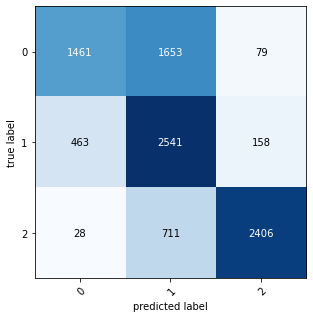

In [81]:
plot_cm(y_test, y_test_pred, modelo.classes_)

#### 4.1.2 LightGBM

In [82]:
modelo = LGBMClassifier(random_state=2022)

modelo.fit(X_train_transformed, y_train)

LGBMClassifier(random_state=2022)

In [83]:
y_train_pred = modelo.predict(X_train_transformed)

y_valid_pred = modelo.predict(X_valid_transformed)

print(y_train_pred.shape, y_valid_pred.shape)

(68400,) (17100,)


In [84]:
score_train(y_train, y_train_pred)

score_valid(y_valid, y_valid_pred)

Treino:
Acc: 0.79, Precision: 0.80, Recall: 0.79
Valida√ß√£o:
Acc: 0.77, Precision: 0.78, Recall: 0.77


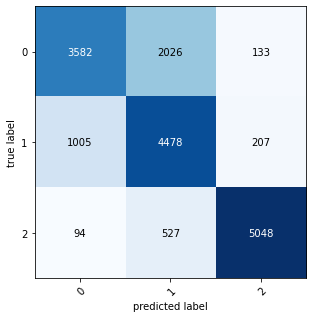

In [85]:
plot_cm(y_valid, y_valid_pred, modelo.classes_)

##### 4.1.2.1 Infer√™ncia na base de teste

In [86]:
X_test_transformed = vectorizer.transform(X_test).toarray()

print(X_test_transformed.shape)

(9500, 10000)


In [87]:
y_test_pred = modelo.predict(X_test_transformed)

print(y_test_pred.shape)

(9500,)


In [88]:
mean_absolute_error(y_test, y_test_pred)

0.24673684210526317

In [89]:
score_test(y_test, y_test_pred)

Teste:
Acc: 0.77, Precision: 0.78, Recall: 0.77


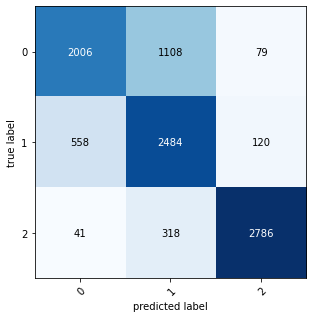

In [90]:
plot_cm(y_test, y_test_pred, modelo.classes_)

##### 4.1.2.2 LightGBM com otimiza√ß√£o

In [91]:
modelo = LGBMClassifier()

parameters = {
    'max_depth': [10, 20],
    'n_estimators': [200, 300],
    'learning_rate': [0.1, 0.5]
}

clf = GridSearchCV(modelo, parameters, verbose=3, scoring='accuracy', cv=3)

clf.fit(X_train_transformed, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END learning_rate=0.1, max_depth=10, n_estimators=200;, score=0.757 total time=   9.3s
[CV 2/3] END learning_rate=0.1, max_depth=10, n_estimators=200;, score=0.762 total time=   9.3s
[CV 3/3] END learning_rate=0.1, max_depth=10, n_estimators=200;, score=0.761 total time=   8.4s
[CV 1/3] END learning_rate=0.1, max_depth=10, n_estimators=300;, score=0.770 total time=   8.1s
[CV 2/3] END learning_rate=0.1, max_depth=10, n_estimators=300;, score=0.771 total time=   9.0s
[CV 3/3] END learning_rate=0.1, max_depth=10, n_estimators=300;, score=0.771 total time=   8.3s
[CV 1/3] END learning_rate=0.1, max_depth=20, n_estimators=200;, score=0.776 total time=  10.2s
[CV 2/3] END learning_rate=0.1, max_depth=20, n_estimators=200;, score=0.778 total time=  11.1s
[CV 3/3] END learning_rate=0.1, max_depth=20, n_estimators=200;, score=0.776 total time=   8.3s
[CV 1/3] END learning_rate=0.1, max_depth=20, n_estimators=300;, score=0.781

GridSearchCV(cv=3, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.1, 0.5], 'max_depth': [10, 20],
                         'n_estimators': [200, 300]},
             scoring='accuracy', verbose=3)

In [92]:
clf.best_params_

{'learning_rate': 0.5, 'max_depth': 20, 'n_estimators': 200}

In [93]:
modelo = LGBMClassifier(**clf.best_params_)

modelo.fit(X_train_transformed, y_train)

LGBMClassifier(learning_rate=0.5, max_depth=20, n_estimators=200)

In [94]:
y_train_pred = modelo.predict(X_train_transformed)

y_valid_pred = modelo.predict(X_valid_transformed)

print(y_train_pred.shape, y_valid_pred.shape)

(68400,) (17100,)


In [95]:
score_train(y_train, y_train_pred)

score_valid(y_valid, y_valid_pred)

Treino:
Acc: 0.86, Precision: 0.87, Recall: 0.86
Valida√ß√£o:
Acc: 0.80, Precision: 0.80, Recall: 0.80


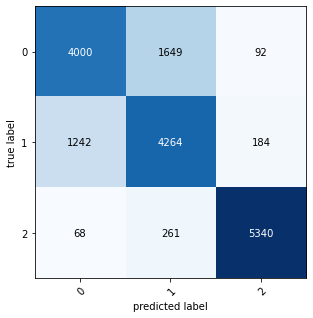

In [96]:
plot_cm(y_valid, y_valid_pred, modelo.classes_)

##### 4.1.2.3 Infer√™ncia na base de teste

In [97]:
X_test_transformed = vectorizer.transform(X_test).toarray()

print(X_test_transformed.shape)

(9500, 10000)


In [98]:
y_test_pred = modelo.predict(X_test_transformed)

print(y_test_pred.shape)

(9500,)


In [99]:
mean_absolute_error(y_test, y_test_pred)

0.2128421052631579

In [100]:
score_test(y_test, y_test_pred)

Teste:
Acc: 0.80, Precision: 0.80, Recall: 0.80


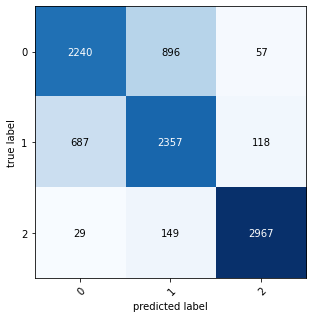

In [101]:
plot_cm(y_test, y_test_pred, modelo.classes_)

##### 4.1.2.4 LightGBM com ajuste manual dos hiperpar√¢metros

In [102]:
modelo = LGBMClassifier(max_depth=20, n_estimators=300, random_state=2022)

modelo.fit(X_train_transformed, y_train)

LGBMClassifier(max_depth=20, n_estimators=300, random_state=2022)

In [103]:
y_train_pred = modelo.predict(X_train_transformed)

y_valid_pred = modelo.predict(X_valid_transformed)

print(y_train_pred.shape, y_valid_pred.shape)

(68400,) (17100,)


In [104]:
score_train(y_train, y_train_pred)

score_valid(y_valid, y_valid_pred)

Treino:
Acc: 0.82, Precision: 0.83, Recall: 0.82
Valida√ß√£o:
Acc: 0.79, Precision: 0.79, Recall: 0.79


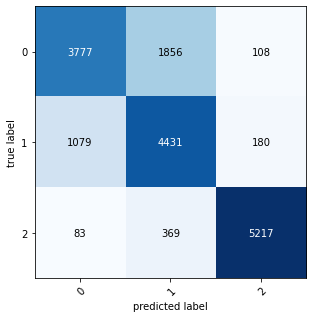

In [105]:
plot_cm(y_valid, y_valid_pred, modelo.classes_)

##### 4.1.2.5 Infer√™ncia na base de teste

In [106]:
X_test_transformed = vectorizer.transform(X_test).toarray()

print(X_test_transformed.shape)

(9500, 10000)


In [107]:
y_test_pred = modelo.predict(X_test_transformed)

print(y_test_pred.shape)

(9500,)


In [108]:
mean_absolute_error(y_test, y_test_pred)

0.22547368421052633

In [109]:
score_test(y_test, y_test_pred)

Teste:
Acc: 0.78, Precision: 0.79, Recall: 0.79


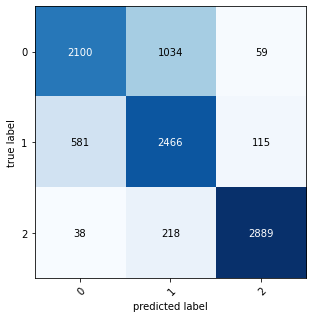

In [110]:
plot_cm(y_test, y_test_pred, modelo.classes_)

#### 4.1.3 Naive Bayes

In [111]:
modelo = MultinomialNB()

modelo.fit(X_train_transformed, y_train)

MultinomialNB()

In [112]:
y_train_pred = modelo.predict(X_train_transformed)

y_valid_pred = modelo.predict(X_valid_transformed)

print(y_train_pred.shape, y_valid_pred.shape)

(68400,) (17100,)


In [113]:
score_train(y_train, y_train_pred)

score_valid(y_valid, y_valid_pred)

Treino:
Acc: 0.82, Precision: 0.82, Recall: 0.82
Valida√ß√£o:
Acc: 0.79, Precision: 0.79, Recall: 0.79


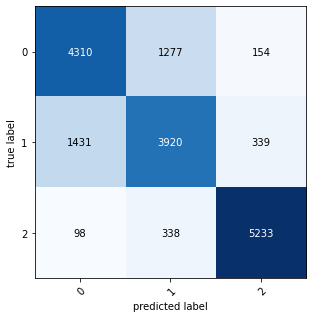

In [114]:
plot_cm(y_valid, y_valid_pred, modelo.classes_)

##### 4.1.3.1 Infer√™ncia na base de teste

In [115]:
X_test_transformed = vectorizer.transform(X_test).toarray()

print(X_test_transformed.shape)

(9500, 10000)


In [116]:
y_test_pred = modelo.predict(X_test_transformed)

print(y_test_pred.shape)

(9500,)


In [117]:
mean_absolute_error(y_test, y_test_pred)

0.22642105263157894

In [118]:
score_test(y_test, y_test_pred)

Teste:
Acc: 0.79, Precision: 0.79, Recall: 0.79


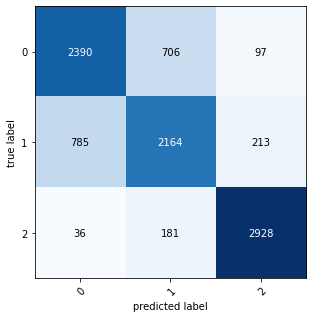

In [119]:
plot_cm(y_test, y_test_pred, modelo.classes_)

### 4.2 TF-IDF

In [120]:
vectorizer = TfidfVectorizer(max_features=10000)

vectorizer.fit(X_train)
    
X_train_transformed = vectorizer.transform(X_train).toarray()
print(X_train_transformed.shape)

X_valid_transformed = vectorizer.transform(X_valid).toarray()
print(X_valid_transformed.shape)

(68400, 10000)
(17100, 10000)


#### 4.2.1 Random Forest

In [121]:
modelo = RandomForestClassifier(max_depth=5, random_state=2022)

modelo.fit(X_train_transformed, y_train)

RandomForestClassifier(max_depth=5, random_state=2022)

In [122]:
y_train_pred = modelo.predict(X_train_transformed)

y_valid_pred = modelo.predict(X_valid_transformed)

print(y_train_pred.shape, y_valid_pred.shape)

(68400,) (17100,)


In [123]:
score_train(y_train, y_train_pred)

score_valid(y_valid, y_valid_pred)

Treino:
Acc: 0.69, Precision: 0.74, Recall: 0.69
Valida√ß√£o:
Acc: 0.68, Precision: 0.73, Recall: 0.68


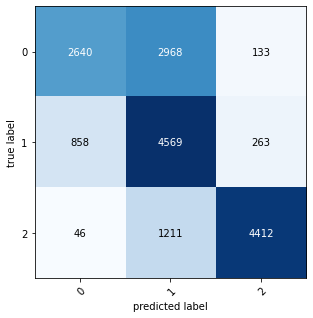

In [124]:
plot_cm(y_valid, y_valid_pred, modelo.classes_)

##### 4.2.1.1 Infer√™ncia na base de teste

In [125]:
X_test_transformed = vectorizer.transform(X_test).toarray()

print(X_test_transformed.shape)

(9500, 10000)


In [126]:
y_test_pred = modelo.predict(X_test_transformed)

print(y_test_pred.shape)

(9500,)


In [127]:
mean_absolute_error(y_test, y_test_pred)

0.32894736842105265

In [128]:
score_test(y_test, y_test_pred)

Teste:
Acc: 0.68, Precision: 0.73, Recall: 0.68


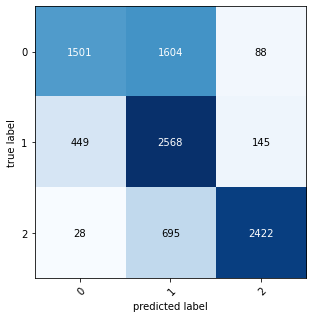

In [129]:
plot_cm(y_test, y_test_pred, modelo.classes_)

#### 4.2.2 LightGBM

In [130]:
modelo = LGBMClassifier(random_state=2022)

modelo.fit(X_train_transformed, y_train)

LGBMClassifier(random_state=2022)

In [131]:
y_train_pred = modelo.predict(X_train_transformed)

y_valid_pred = modelo.predict(X_valid_transformed)

print(y_train_pred.shape, y_valid_pred.shape)

(68400,) (17100,)


In [132]:
score_train(y_train, y_train_pred)

score_valid(y_valid, y_valid_pred)

Treino:
Acc: 0.80, Precision: 0.81, Recall: 0.80
Valida√ß√£o:
Acc: 0.77, Precision: 0.79, Recall: 0.77


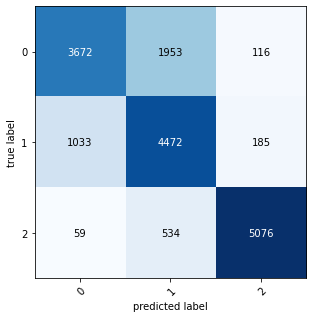

In [133]:
plot_cm(y_valid, y_valid_pred, modelo.classes_)

##### 4.2.2.1 Infer√™ncia na base de teste

In [134]:
X_test_transformed = vectorizer.transform(X_test).toarray()

print(X_test_transformed.shape)

(9500, 10000)


In [135]:
y_test_pred = modelo.predict(X_test_transformed)

print(y_test_pred.shape)

(9500,)


In [136]:
mean_absolute_error(y_test, y_test_pred)

0.2423157894736842

In [137]:
score_test(y_test, y_test_pred)

Teste:
Acc: 0.77, Precision: 0.78, Recall: 0.77


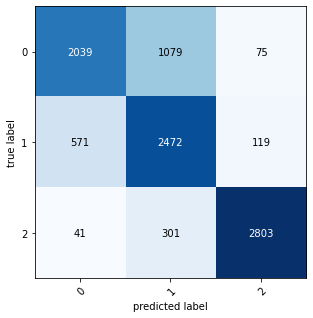

In [138]:
plot_cm(y_test, y_test_pred, modelo.classes_)

#### 4.2.3 Naive Bayes

In [139]:
modelo = MultinomialNB()

modelo.fit(X_train_transformed, y_train)

MultinomialNB()

In [140]:
y_train_pred = modelo.predict(X_train_transformed)

y_valid_pred = modelo.predict(X_valid_transformed)

print(y_train_pred.shape, y_valid_pred.shape)

(68400,) (17100,)


In [141]:
score_train(y_train, y_train_pred)

score_valid(y_valid, y_valid_pred)

Treino:
Acc: 0.82, Precision: 0.82, Recall: 0.82
Valida√ß√£o:
Acc: 0.78, Precision: 0.78, Recall: 0.78


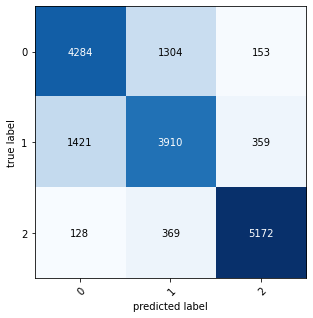

In [142]:
plot_cm(y_valid, y_valid_pred, modelo.classes_)

##### 4.2.3.1 Infer√™ncia na base de teste

In [143]:
X_test_transformed = vectorizer.transform(X_test).toarray()

print(X_test_transformed.shape)

(9500, 10000)


In [144]:
y_test_pred = modelo.predict(X_test_transformed)

print(y_test_pred.shape)

(9500,)


In [145]:
mean_absolute_error(y_test, y_test_pred)

0.23189473684210526

In [146]:
score_test(y_test, y_test_pred)

Teste:
Acc: 0.78, Precision: 0.78, Recall: 0.78


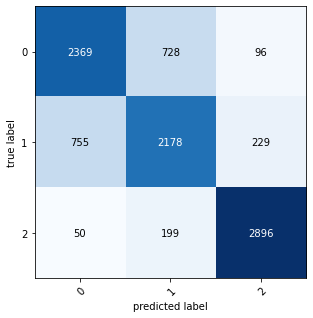

In [147]:
plot_cm(y_test, y_test_pred, modelo.classes_)

### 4.3 Word2Vec

In [148]:
# Fun√ß√£o para quebrar um texto em palavras
def tokenize(text):
    return simple_preprocess(text, min_len=1)

def to_word_vector(words, w2v):

    vectors = []

    for word in words:
        vectors.append(w2v.wv[word] if word in w2v.wv.key_to_index else np.zeros(w2v.vector_size))
        
    if not vectors:
        vectors.append(np.zeros(w2v.vector_size))
    
    return np.mean(vectors, axis=0)

def embeddings(x, w2v):
    x = x.copy()

    x = x.apply(tokenize)

    x = np.vstack([[to_word_vector(sentences, w2v)] for sentences in tqdm(x)])

    return x

In [149]:
# Vers√£o mais recente do gensim: par√¢metro size virou vector_size
model_w2v = Word2Vec(
        sentences=X_train.apply(
            lambda t: tokenize(t)
        ),
         vector_size=300, # n√∫mero de features
         window=5,
         min_count=1,
         workers=4
    )

In [150]:
# N√∫mero de palavras
len(model_w2v.wv)

50745

In [151]:
model_w2v.wv.key_to_index

{'g': 0,
 'trabalho': 1,
 'dia': 2,
 'vai': 3,
 'fato': 4,
 'bolsonaro': 5,
 'vou': 6,
 'ser': 7,
 'to': 8,
 'bem': 9,
 'queria': 10,
 'diz': 11,
 'vc': 12,
 'oportunidade': 13,
 'gt': 14,
 'ter': 15,
 'bom': 16,
 't√°': 17,
 'tudo': 18,
 'gente': 19,
 'aqui': 20,
 'pq': 21,
 'agora': 22,
 'hoje': 23,
 'n': 24,
 'fazer': 25,
 'ainda': 26,
 'sobre': 27,
 'emprego': 28,
 'ver': 29,
 't√£o': 30,
 'triste': 31,
 't√¥': 32,
 'elei√ß√µes': 33,
 'amo': 34,
 'sim': 35,
 'brasil': 36,
 'sp': 37,
 'nao': 38,
 'vaga': 39,
 'pode': 40,
 'quero': 41,
 'nada': 42,
 'ai': 43,
 'sei': 44,
 'haddad': 45,
 'sempre': 46,
 'assim': 47,
 'vida': 48,
 'boa': 49,
 'melhor': 50,
 'veja': 51,
 'pessoas': 52,
 'anos': 53,
 'tanto': 54,
 'acho': 55,
 'faz': 56,
 'ir': 57,
 'todos': 58,
 'mundo': 59,
 'nunca': 60,
 'mim': 61,
 'ta': 62,
 'coisa': 63,
 'feliz': 64,
 'amor': 65,
 'novo': 66,
 'e': 67,
 'casa': 68,
 'a√≠': 69,
 'ficar': 70,
 'todo': 71,
 'ap√≥s': 72,
 'turno': 73,
 'contra': 74,
 'novidade': 75,
 'c

In [152]:
# Verificando se a similaridade entre as palavras faz sentido
model_w2v.wv.most_similar('bom', topn=5)

[('inteiro', 0.9632234573364258),
 ('√≥timo', 0.9609524607658386),
 ('cada', 0.9536773562431335),
 ('inteirinho', 0.9407674074172974),
 ('frequencia', 0.9385398626327515)]

In [153]:
model_w2v.wv.most_similar('ruim', topn=5)

[('dif√≠cil', 0.9956362843513489),
 ('complicado', 0.9904137849807739),
 ('foda', 0.9902738332748413),
 ('merda', 0.984769880771637),
 ('acontecendo', 0.9839526414871216)]

In [154]:
model_w2v.wv.most_similar('elei√ß√£o', topn=5)

[('√∫til', 0.9792302250862122),
 ('globolixo', 0.9720737338066101),
 ('√°lvaro', 0.9651808738708496),
 ('candidato', 0.9640286564826965),
 ('presidente', 0.9627859592437744)]

In [155]:
model_w2v.wv.most_similar('haddad', topn=5)

[('pt', 0.9918227791786194),
 ('governabilidade', 0.9860545992851257),
 ('voto', 0.9854965209960938),
 ('boulos', 0.9850244522094727),
 ('bolsonaro', 0.983104407787323)]

In [156]:
model_w2v.wv.most_similar('bolsonaro', topn=5)

[('haddad', 0.9831045269966125),
 ('lula', 0.9803621172904968),
 ('alavancar', 0.9801177978515625),
 ('barrar', 0.9795096516609192),
 ('marina', 0.9787560701370239)]

In [157]:
X_train_transformed = embeddings(X_train, model_w2v)

X_valid_transformed = embeddings(X_valid, model_w2v)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 17100/17100 [00:00<00:00, 30218.52it/s]


In [158]:
pd.DataFrame(X_train_transformed[:10])

0         1         2         3         4         5         6    \
0 -0.046884  0.545185  0.124119  0.197664  0.108461 -0.366275  0.281552   
1 -0.092796  0.516200 -0.152287  0.041727 -0.206665 -0.372497  0.099686   
2 -0.062371  0.056218 -0.007276  0.044744 -0.094237 -0.350459  0.005787   
3 -0.015254  0.470102  0.090870  0.245909  0.105488 -0.477800  0.234148   
4 -0.095440  0.135069 -0.054746  0.078568  0.021274 -0.047393  0.041431   
5 -0.048065  0.338624 -0.036668  0.096731 -0.036284 -0.279309  0.132747   
6 -0.099384  0.508381  0.129548  0.259525  0.100797 -0.416559  0.287469   
7 -0.003681  0.243667 -0.007002  0.084753  0.025924 -0.186215  0.101848   
8 -0.067265  0.125045 -0.017388  0.077153 -0.074119 -0.251853  0.048583   
9 -0.020484  0.485949  0.081242  0.201406  0.025800 -0.535698  0.232973   

        7         8         9    ...       290       291       292       293  \
0  0.825977  0.189865 -0.069179  ...  0.049278  0.505028  0.291573 -0.096925   
1  0.023742 -0.088028 -0.264351  ...  0.462875  0.610164  0.669699  0.031640   
2  0.533332  0.120556 -0.074917  ...  0.123929  0.216690  0.346593  0.061920   
3  0.962773  0.164396 -0.191503  ... -0.045828  0.390260  0.304912 -0.117338   
4  0.111506  0.059503 -0.029917  ...  0.076005  0.230659  0.146346  0.074026   
5  0.356165  0.040915 -0.166018  ...  0.116653  0.366603  0.318594  0.027968   
6  0.991234  0.210132 -0.134303  ... -0.062136  0.495340  0.245799 -0.061501   
7  0.369744  0.054848 -0.120806  ...  0.017724  0.227170  0.169777 -0.004001   
8  0.304358  0.028372 -0.098996  ...  0.080332  0.232648  0.273662  0.064496   
9  1.156338  0.232858 -0.268910  ... -0.070295  0.429504  0.367091 -0.038573   

        294       295       296       297       298       299  
0  0.335181  0.618274  0.065694 -0.069789  0.234492  0.208438  
1  0.195800  0.366865 -0.257459 -0.561805  0.347668 -0.300344  
2  0.045007  0.186526  0.026497 -0.145276  0.297947 -0.022336  
3  0.359665  0.602042  0.226329 -0.058597  0.202197  0.207827  
4  0.060295 -0.028775 -0.264629 -0.263565  0.125847 -0.025130  
5  0.179957  0.334303 -0.068119 -0.227310  0.202188 -0.028337  
6  0.344428  0.680226  0.111356 -0.070535  0.278575  0.225608  
7  0.169839  0.287425  0.006341 -0.106301  0.100056  0.051605  
8  0.078396  0.169170 -0.043829 -0.144244  0.207856 -0.081142  
9  0.419119  0.710538  0.200709 -0.084222  0.302714  0.255187  

[10 rows x 300 columns]

### Word embeddings

In [159]:
# Fun√ß√£o para "plotar" uma amostra de um conjunto de palavras e observar suas posi√ß√µes para ver se as proximidades fazem sentido
def plot_words(words, model_w2v):
    vocab = [word for word in model_w2v.wv.key_to_index]

    X = model_w2v.wv.vectors

    pca = PCA(n_components=2)
    X_reduct = pca.fit_transform(X)

    df = pd.DataFrame(X_reduct, index=vocab, columns=['x', 'y'])

    if type(words) == int:
        df = df.sample(min(words, len(df)))
    else:
        df = df.loc[words]

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1)

    ax.scatter(df['x'], df['y'])

    for word, pos in df.iterrows():
        ax.annotate(word, pos)

    plt.show()

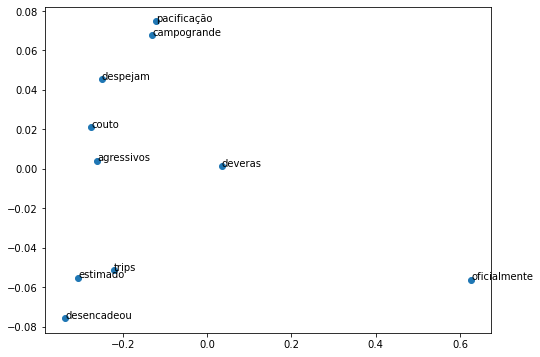

In [160]:
# "Plotando" apenas 10 palavras de um conjunto de 50745
plot_words(10, model_w2v)

"Plotar" apenas 10 palavras de um conjunto de 50745 n√£o parece trazer informa√ß√µes relevantes.

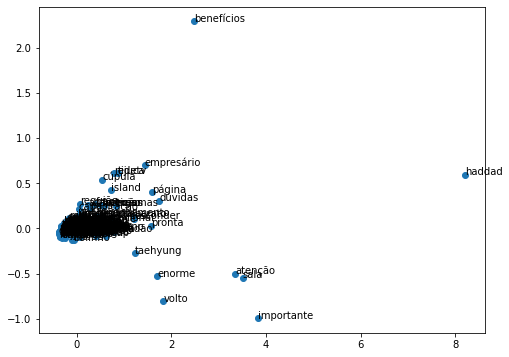

In [161]:
# "Plotando" 200 palavras de um conjunto de 50745
plot_words(200, model_w2v)

"Plotando" 200 palavras, √†s vezes, damos a "sorte" de observar uma proximidade entre palavras similares, como "jovem" e "novos", que apareceram em uma das vezes em que gerei esse gr√°fico.

#### 4.3.1 Random Forest

In [162]:
modelo = RandomForestClassifier(max_depth=5, random_state=2022)

modelo.fit(X_train_transformed, y_train)

RandomForestClassifier(max_depth=5, random_state=2022)

In [163]:
y_train_pred = modelo.predict(X_train_transformed)

y_valid_pred = modelo.predict(X_valid_transformed)

print(y_train_pred.shape, y_valid_pred.shape)

(68400,) (17100,)


In [164]:
score_train(y_train, y_train_pred)

score_valid(y_valid, y_valid_pred)

Treino:
Acc: 0.73, Precision: 0.73, Recall: 0.73
Valida√ß√£o:
Acc: 0.71, Precision: 0.72, Recall: 0.71


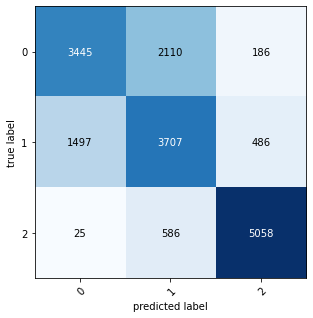

In [165]:
plot_cm(y_valid, y_valid_pred, modelo.classes_)

##### 4.3.1.1 Infer√™ncia na base de teste

In [166]:
X_test_transformed = embeddings(X_test, model_w2v)

X_test_transformed.shape

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9500/9500 [00:00<00:00, 26299.44it/s]


(9500, 300)

In [167]:
y_test_pred = modelo.predict(X_test_transformed)

print(y_test_pred.shape)

(9500,)


In [168]:
mean_absolute_error(y_test, y_test_pred)

0.29947368421052634

In [169]:
score_test(y_test, y_test_pred)

Teste:
Acc: 0.71, Precision: 0.72, Recall: 0.72


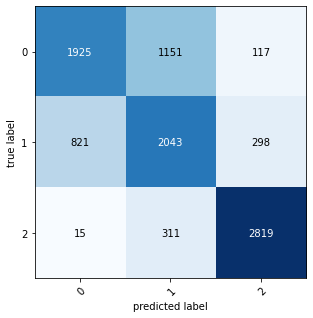

In [170]:
plot_cm(y_test, y_test_pred, modelo.classes_)

#### 4.3.2 LightGBM

In [171]:
modelo = LGBMClassifier(random_state=2022)

modelo.fit(X_train_transformed, y_train)

LGBMClassifier(random_state=2022)

In [172]:
y_train_pred = modelo.predict(X_train_transformed)

y_valid_pred = modelo.predict(X_valid_transformed)

print(y_train_pred.shape, y_valid_pred.shape)

(68400,) (17100,)


In [173]:
score_train(y_train, y_train_pred)

score_valid(y_valid, y_valid_pred)

Treino:
Acc: 0.80, Precision: 0.80, Recall: 0.80
Valida√ß√£o:
Acc: 0.75, Precision: 0.75, Recall: 0.75


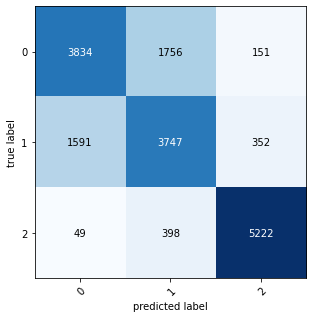

In [174]:
plot_cm(y_valid, y_valid_pred, modelo.classes_)

##### 4.3.2.1 Infer√™ncia na base de teste

In [175]:
X_test_transformed = embeddings(X_test, model_w2v)

X_test_transformed.shape

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9500/9500 [00:00<00:00, 31123.47it/s]


(9500, 300)

In [176]:
y_test_pred = modelo.predict(X_test_transformed)

print(y_test_pred.shape)

(9500,)


In [177]:
mean_absolute_error(y_test, y_test_pred)

0.2651578947368421

In [178]:
score_test(y_test, y_test_pred)

Teste:
Acc: 0.75, Precision: 0.75, Recall: 0.75


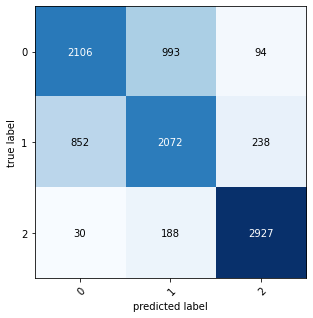

In [179]:
plot_cm(y_test, y_test_pred, modelo.classes_)

##### 4.3.2.2 LightGBM com ajuste manual dos hiperpar√¢metros

In [180]:
modelo = LGBMClassifier(max_depth=4, random_state=2022)

modelo.fit(X_train_transformed, y_train)

LGBMClassifier(max_depth=4, random_state=2022)

In [181]:
y_train_pred = modelo.predict(X_train_transformed)

y_valid_pred = modelo.predict(X_valid_transformed)

print(y_train_pred.shape, y_valid_pred.shape)

(68400,) (17100,)


In [182]:
score_train(y_train, y_train_pred)

score_valid(y_valid, y_valid_pred)

Treino:
Acc: 0.77, Precision: 0.77, Recall: 0.77
Valida√ß√£o:
Acc: 0.74, Precision: 0.74, Recall: 0.74


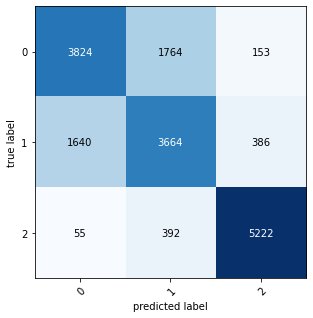

In [183]:
plot_cm(y_valid, y_valid_pred, modelo.classes_)

##### 4.3.2.3 Infer√™ncia na base de teste

In [184]:
X_test_transformed = embeddings(X_test, model_w2v)

X_test_transformed.shape

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9500/9500 [00:00<00:00, 25190.78it/s]


(9500, 300)

In [185]:
y_test_pred = modelo.predict(X_test_transformed)

print(y_test_pred.shape)

(9500,)


In [186]:
mean_absolute_error(y_test, y_test_pred)

0.27042105263157895

In [187]:
score_test(y_test, y_test_pred)

Teste:
Acc: 0.74, Precision: 0.74, Recall: 0.74


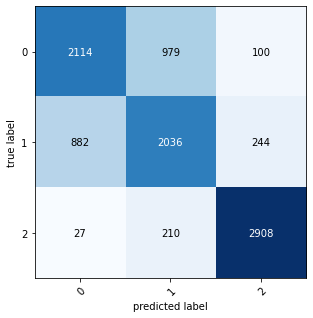

In [188]:
plot_cm(y_test, y_test_pred, modelo.classes_)

#### 4.3.3 Naive Bayes

In [189]:
# Normalizando os dados para rodar o modelo Naive Bayes com Word2Vec
scaler = MinMaxScaler()
X_train_transformed = scaler.fit_transform(X_train_transformed)
X_valid_transformed = scaler.fit_transform(X_valid_transformed)

In [190]:
modelo = MultinomialNB()

modelo.fit(X_train_transformed, y_train)

MultinomialNB()

In [191]:
y_train_pred = modelo.predict(X_train_transformed)

y_valid_pred = modelo.predict(X_valid_transformed)

print(y_train_pred.shape, y_valid_pred.shape)

(68400,) (17100,)


In [192]:
score_train(y_train, y_train_pred)

score_valid(y_valid, y_valid_pred)

Treino:
Acc: 0.64, Precision: 0.63, Recall: 0.64
Valida√ß√£o:
Acc: 0.63, Precision: 0.62, Recall: 0.63


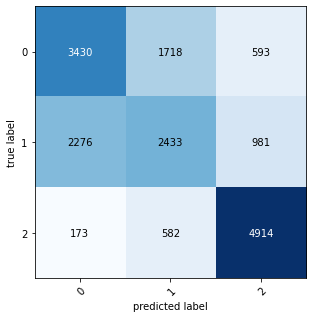

In [193]:
plot_cm(y_valid, y_valid_pred, modelo.classes_)

##### 4.3.3.1 Infer√™ncia na base de teste

In [194]:
X_test_transformed = embeddings(X_test, model_w2v)

X_test_transformed.shape

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9500/9500 [00:00<00:00, 24002.82it/s]


(9500, 300)

In [195]:
# Normalizando os dados para rodar o modelo Naive Bayes com Word2Vec
scaler = MinMaxScaler()
X_test_transformed = scaler.fit_transform(X_test_transformed)

In [196]:
y_test_pred = modelo.predict(X_test_transformed)

print(y_test_pred.shape)

(9500,)


In [197]:
mean_absolute_error(y_test, y_test_pred)

0.48757894736842106

In [198]:
score_test(y_test, y_test_pred)

Teste:
Acc: 0.59, Precision: 0.59, Recall: 0.59


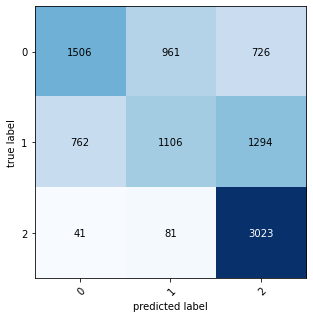

In [199]:
plot_cm(y_test, y_test_pred, modelo.classes_)

## 5. Resultados

- Bag Of Words e Random Forest (max_depth=5):
    
|           | Acur√°cia | Precis√£o | Recall | Overfitting | MAE |
|-----------|----------|----------|--------|-------------|-----|
| Treino    |   68%    |   73%    |  68%   |             |     |
| Valida√ß√£o |   68%    |   73%    |  68%   |      0      |     |
| Teste     |   67%    |   73%    |  68%   |             | 34% |


- Bag Of Words e LightGBM:
    
|           | Acur√°cia | Precis√£o | Recall | Overfitting | MAE |
|-----------|----------|----------|--------|-------------|-----|
| Treino    |   79%    |   80%    |  79%   |             |     |
| Valida√ß√£o |   77%    |   78%    |  77%   |      2%     |     |
| Teste     |   77%    |   78%    |  77%   |             | 25% |
    
- Bag Of Words e LightGBM (com otimiza√ß√£o, utilizando o GridSearch):   
    
|           | Acur√°cia | Precis√£o | Recall | Overfitting | MAE |
|-----------|----------|----------|--------|-------------|-----|
| Treino    |   86%    |   87%    |  86%   |             |     |
| Valida√ß√£o |   80%    |   80%    |  80%   |      6%     |     |
| Teste     |   80%    |   80%    |  80%   |             | 21% |

Como houve um overfitting de 6%, fui ajustando os hiperpar√¢metros at√© conseguir ao menos 3%.    
    
- Bag Of Words e LightGBM (com ajuste manual dos hiperpar√¢metros: max_depth=20, n_estimators=300):
    
|           | Acur√°cia | Precis√£o | Recall | Overfitting | MAE |
|-----------|----------|----------|--------|-------------|-----|
| Treino    |   82%    |   83%    |  82%   |             |     |
| Valida√ß√£o |   79%    |   79%    |  79%   |      3%     |     |
| Teste     |   78%    |   79%    |  79%   |             | 22% |
    
- Bag Of Words e Naive Bayes:

|           | Acur√°cia | Precis√£o | Recall | Overfitting | MAE |
|-----------|----------|----------|--------|-------------|-----|
| Treino    |   82%    |   82%    |  82%   |             |     |
| Valida√ß√£o |   79%    |   79%    |  79%   |      3%     |     |
| Teste     |   79%    |   79%    |  79%   |             | 23% |

- TF-IDF e Random Forest (max_depth=5):

|           | Acur√°cia | Precis√£o | Recall | Overfitting | MAE |
|-----------|----------|----------|--------|-------------|-----|
| Treino    |   69%    |   74%    |  69%   |             |     |
| Valida√ß√£o |   68%    |   73%    |  68%   |      1%     |     |
| Teste     |   68%    |   73%    |  68%   |             | 33% |
    
- TF-IDF e e LightGBM:

|           | Acur√°cia | Precis√£o | Recall | Overfitting | MAE |
|-----------|----------|----------|--------|-------------|-----|
| Treino    |   80%    |   81%    |  80%   |             |     |
| Valida√ß√£o |   77%    |   79%    |  77%   |      3%     |     |
| Teste     |   77%    |   78%    |  77%   |             | 24% |
       
- TF-IDF e Naive Bayes:
    
|           | Acur√°cia | Precis√£o | Recall | Overfitting | MAE |
|-----------|----------|----------|--------|-------------|-----|
| Treino    |   82%    |   82%    |  82%   |             |     |
| Valida√ß√£o |   78%    |   78%    |  78%   |      4%     |     |
| Teste     |   78%    |   78%    |  78%   |             | 23% |

- Word2Vec e Random Forest (max_depth=5):
    
|           | Acur√°cia | Precis√£o | Recall | Overfitting | MAE |
|-----------|----------|----------|--------|-------------|-----|
| Treino    |   73%    |   73%    |  73%   |             |     |
| Valida√ß√£o |   71%    |   72%    |  71%   |      2%     |     |
| Teste     |   71%    |   72%    |  72%   |             | 30% |

- Word2Vec e LightGBM:
    
|           | Acur√°cia | Precis√£o | Recall | Overfitting | MAE |
|-----------|----------|----------|--------|-------------|-----|
| Treino    |   80%    |   80%    |  80%   |             |     |
| Valida√ß√£o |   75%    |   75%    |  75%   |      5%     |     |
| Teste     |   75%    |   75%    |  75%   |             | 26% |

- Word2Vec e LightGBM (com ajuste manual dos hiperpar√¢metros: max_depth=4):

|           | Acur√°cia | Precis√£o | Recall | Overfitting | MAE |
|-----------|----------|----------|--------|-------------|-----|
| Treino    |   77%    |   77%    |  77%   |             |     |
| Valida√ß√£o |   74%    |   74%    |  74%   |      3%     |     |
| Teste     |   74%    |   74%    |  74%   |             | 27% |
    
- Word2Vec e Naive Bayes:
    
|           | Acur√°cia | Precis√£o | Recall | Overfitting | MAE |
|-----------|----------|----------|--------|-------------|-----|
| Treino    |   64%    |   63%    |  64%   |             |     |
| Valida√ß√£o |   63%    |   62%    |  63%   |      1%     |     |
| Teste     |   59%    |   59%    |  59%   |             | 49% |

### 5.1 Escolha do modelo

De acordo com os resultados obtidos, o modelo escolhido foi o Naive Bayes com o Bag Of Words, que obteve um erro absoluto m√©dio de 23% e a melhor acur√°cia na base de teste (79%), considerando um overfitting de at√© 3% entre a base de treino e valida√ß√£o.

### 5.2 Executando o modelo escolhido

#### 5.2.1 Bag Of Words

In [200]:
vectorizer = CountVectorizer(max_features=10000)

vectorizer.fit(X_train)
    
X_train_transformed = vectorizer.transform(X_train).toarray()
print(X_train_transformed.shape)

X_valid_transformed = vectorizer.transform(X_valid).toarray()
print(X_valid_transformed.shape)

(68400, 10000)
(17100, 10000)


#### 5.2.2 Naive Bayes

In [201]:
modelo = MultinomialNB()

modelo.fit(X_train_transformed, y_train)

MultinomialNB()

In [202]:
y_train_pred = modelo.predict(X_train_transformed)

y_valid_pred = modelo.predict(X_valid_transformed)

print(y_train_pred.shape, y_valid_pred.shape)

(68400,) (17100,)


In [203]:
score_train(y_train, y_train_pred)

score_valid(y_valid, y_valid_pred)

Treino:
Acc: 0.82, Precision: 0.82, Recall: 0.82
Valida√ß√£o:
Acc: 0.79, Precision: 0.79, Recall: 0.79


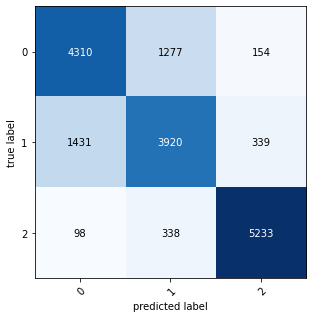

In [204]:
plot_cm(y_valid, y_valid_pred, modelo.classes_)

#### 5.2.3 Infer√™ncia na base de teste

In [205]:
X_test_transformed = vectorizer.transform(X_test).toarray()

print(X_test_transformed.shape)

(9500, 10000)


In [206]:
y_test_pred = modelo.predict(X_test_transformed)

print(y_test_pred.shape)

(9500,)


In [207]:
mean_absolute_error(y_test, y_test_pred)

0.22642105263157894

In [208]:
score_test(y_test, y_test_pred)

Teste:
Acc: 0.79, Precision: 0.79, Recall: 0.79


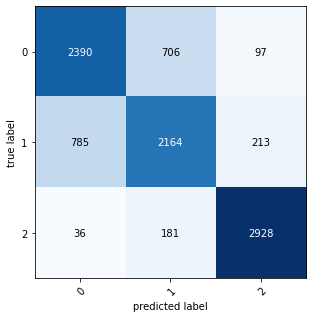

In [209]:
plot_cm(y_test, y_test_pred, modelo.classes_)

In [210]:
# Criando uma coluna ("sentiment_2") com as predi√ß√µes
df_test_2 = df_test.copy()
df_test_2['sentiment_2'] = modelo.predict(X_test_transformed)
df_test_2.head()

id  \
48396  1046719569988071424   
85465  1043632794012913670   
82775  1046780017894723584   
11787  1044193740724801537   
71538  1049308609350434816   

                                                                                                               tweet_text  \
48396                                                                   Que semana gostosa ein, sol agora e chuva find :(   
85465                        Fim de uma era? Atriz de Grey's Anatomy d√° pistas sobre fim da s√©rie https://t.co/ghx9PpoGUG   
82775                                                                                                          0 furos :)   
11787  Piv√¥ de esc√¢ndalo sexual envolvendo o Pr√™mio Nobel, franc√™s deve pegar tr√™s anos de pris√£o https://t.co/oDBgcKzPri   
71538                                                                                                Minha tia faleceu :(   

                           tweet_date  sentiment query_used  sentiment_2  
48396  Mon Oct 01 11:12:47 +0000 2018          0         :(            0  
85465  Sat Sep 22 22:47:02 +0000 2018          2      folha            2  
82775  Mon Oct 01 15:12:59 +0000 2018          1         :)            1  
11787  Mon Sep 24 11:56:02 +0000 2018          2      folha            2  
71538  Mon Oct 08 14:40:42 +0000 2018          0         :(            0

In [211]:
# Verificando o balanceamento dos valores em "sentiment_2"
df_test_2['sentiment_2'].value_counts(normalize=True)*100

2    34.084211
0    33.800000
1    32.115789
Name: sentiment_2, dtype: float64

## 6. Submiss√£o

In [212]:
df_subm = pd.read_csv('Dados/subm/Subm3Classes.csv')

print(df_subm.shape)

df_subm.sample(10).head()

(5000, 4)


id  \
9     1049319300551593989   
2094  1049161019048771584   
615   1048716862933164032   
2562  1039247907038347264   
693   1049306823914921984   

                                                                                                                                                        tweet_text  \
9                                                                                                                      @LauandaVentura Vou tentar mais uma vez :-)   
2094                                                                    Como foi o melhor sonho que voc√™ j√° teve? ‚Äî um com o sehyoon kk :( https://t.co/LhovCa9tpg   
615                                                                   Em pronunciamento, Rosa Weber defende toler√¢ncia e seguran√ßa da urna https://t.co/6hmUwrvuGN   
2562  &gt;@EstadaoLink No dia mundial de preven√ß√£o ao suic√≠dio, Twitter anuncia novo servi√ßo para alertar usu√°rios https://t.co/yFhb6rOcfj https://t.co/e9R2xEriDV   
693                                                                               @_llolorena eu passei v√©i, mas agora n√£o consigo nem passar meu piercing mais :(   

                          tweet_date query_used  
9     Mon Oct 08 15:23:11 +0000 2018         :)  
2094  Mon Oct 08 04:54:14 +0000 2018         :(  
615   Sat Oct 06 23:29:18 +0000 2018      exame  
2562  Mon Sep 10 20:23:03 +0000 2018    estadao  
693   Mon Oct 08 14:33:36 +0000 2018         :(

In [213]:
X_subm = df_subm['tweet_text']

X_subm = clean_username(X_subm)
X_subm = clean_url(X_subm)
X_subm = normalize_texts(X_subm)
X_subm = clean_pt_stopwords(X_subm)

print(X_subm.shape)

(5000,)


In [214]:
X_subm_transformed = vectorizer.transform(X_subm).toarray()

print(X_subm_transformed.shape)

(5000, 10000)


In [215]:
y_subm_pred = modelo.predict(X_subm_transformed)

print(y_subm_pred.shape)

(5000,)


In [216]:
# Criando uma coluna ("sentiment_predict") com as predi√ß√µes
df_subm_2 = df_subm.copy()
df_subm_2['sentiment_predict'] = modelo.predict(X_subm_transformed)
df_subm_2.head()

id  \
0  1046764676707753987   
1  1047329264943751169   
2  1045443874947313665   
3  1040484298711814144   
4  1045411876887306240   

                                                                                                                                                                                                                                          tweet_text  \
0  Apartamento Vila Mariana Pra√ßa Monteiro dos Santos O iMudou √© especialista em im√≥veis e encontrou 7 oportunidades para a busca apartamento vila mariana praca monteiro dos santos. Temos as ofertas com o menor pre√ßo! :) https://t.co/8JlJ0N1Ewe   
1                                                                                                                                                                   @FalleNCS @BrasilGameShow quero 1x1 de scout. Dizem que dou muita bala cagada :)   
2                                                                                                                                          mais uma anal√≥gica no correio √† minha espera :D S√≥ falta receber duas lentes e come√ßar a revelar em casa.   
3                                                                                                                                                      Em festa de posse como presidente do STF, Toffoli canta Legi√£o Urbana https://t.co/IEs709I35Z   
4                                                                                                                                                            @thethiagor @jubsilva @GSCISA @GrupoMulheRIs A Fl√°via tem tuiter tamb√©m @fmedeirosss :)   

                       tweet_date query_used  sentiment_predict  
0  Mon Oct 01 14:12:01 +0000 2018         :)                  1  
1  Wed Oct 03 03:35:29 +0000 2018         :)                  1  
2  Thu Sep 27 22:43:37 +0000 2018         :)                  1  
3  Fri Sep 14 06:16:02 +0000 2018      folha                  2  
4  Thu Sep 27 20:36:28 +0000 2018         :)                  1

In [217]:
# Verificando o balanceamento dos valores em "sentiment_predict"
df_subm_2['sentiment_predict'].value_counts(normalize=True)*100

2    34.3
0    33.7
1    32.0
Name: sentiment_predict, dtype: float64

In [218]:
# Removendo as colunas desnecess√°rias para o arquivo csv
df_subm_2 = df_subm_2.drop(['tweet_text', 'tweet_date', 'query_used'], axis=1).copy()
df_subm_2.head()

id  sentiment_predict
0  1046764676707753987                  1
1  1047329264943751169                  1
2  1045443874947313665                  1
3  1040484298711814144                  2
4  1045411876887306240                  1

In [219]:
# Salvando o DF em um arquivo csv
df_subm_2.to_csv('projeto_2_nlp.csv', index=False)

In [220]:
# Verificando o arquivo salvo
df_tha = pd.read_csv('projeto_2_nlp.csv')

df_tha.head()

id  sentiment_predict
0  1046764676707753987                  1
1  1047329264943751169                  1
2  1045443874947313665                  1
3  1040484298711814144                  2
4  1045411876887306240                  1

## 7. Conclus√µes

Na primeira etapa do projeto, observou-se a inexist√™ncia tanto de dados faltantes quanto de duplicados, no dataframe como um todo.   
Na coluna "tweet_text", havia poucos dados duplicados (menos de 1%) e, portanto, nada foi feito em rela√ß√£o a essas duplicatas.

Na an√°lise explorat√≥ria, verificou-se que:   
    - os dados de sa√≠da estavam balanceados;   
    - a maioria dos textos duplicados s√£o de sentimento positivo;   
    - os textos maiores tendem a ter um sentimento neutro;   
    - os textos menores tendem a ter um sentimento negativo;   
    - o sentimento negativo nos textos parece estar mais associado √† nostalgia ou a um anseio de se obter aquilo que deseja;   
    - os sentimentos negativos e positivos s√£o identificados apenas em um relativo curto per√≠odo de tempo (√©poca de elei√ß√£o).

Com os dados preparados, realizou-se o pr√©-processamento utilizando:   
    - Bag Of Words;   
    - TF-IDF;   
    - Word2Vec.

Com os dados prontos, realizou-se a modelagem utilizando:    
    - Random Forest;      
    - LightGBM;   
    - Naive Bayes.

O modelo escolhido como melhor foi o Naive Bayes, utilizando o Bag Of Words no pr√©-processamento, por ter apresentado um erro absoluto m√©dio de 23% e a melhor acur√°cia (79%) na base de teste, considerando um overfitting de at√© 3% entre a base de treino e valida√ß√£o.